



# PRCP-1009-CellphonePrice

## Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled ,
  wifi ,Bluetooth, Ram etc predict the Price range of the mobile.
* Task 3:- Prepare the analysis report stating how model will help expanding the
  business by stating several factors including feature importance.

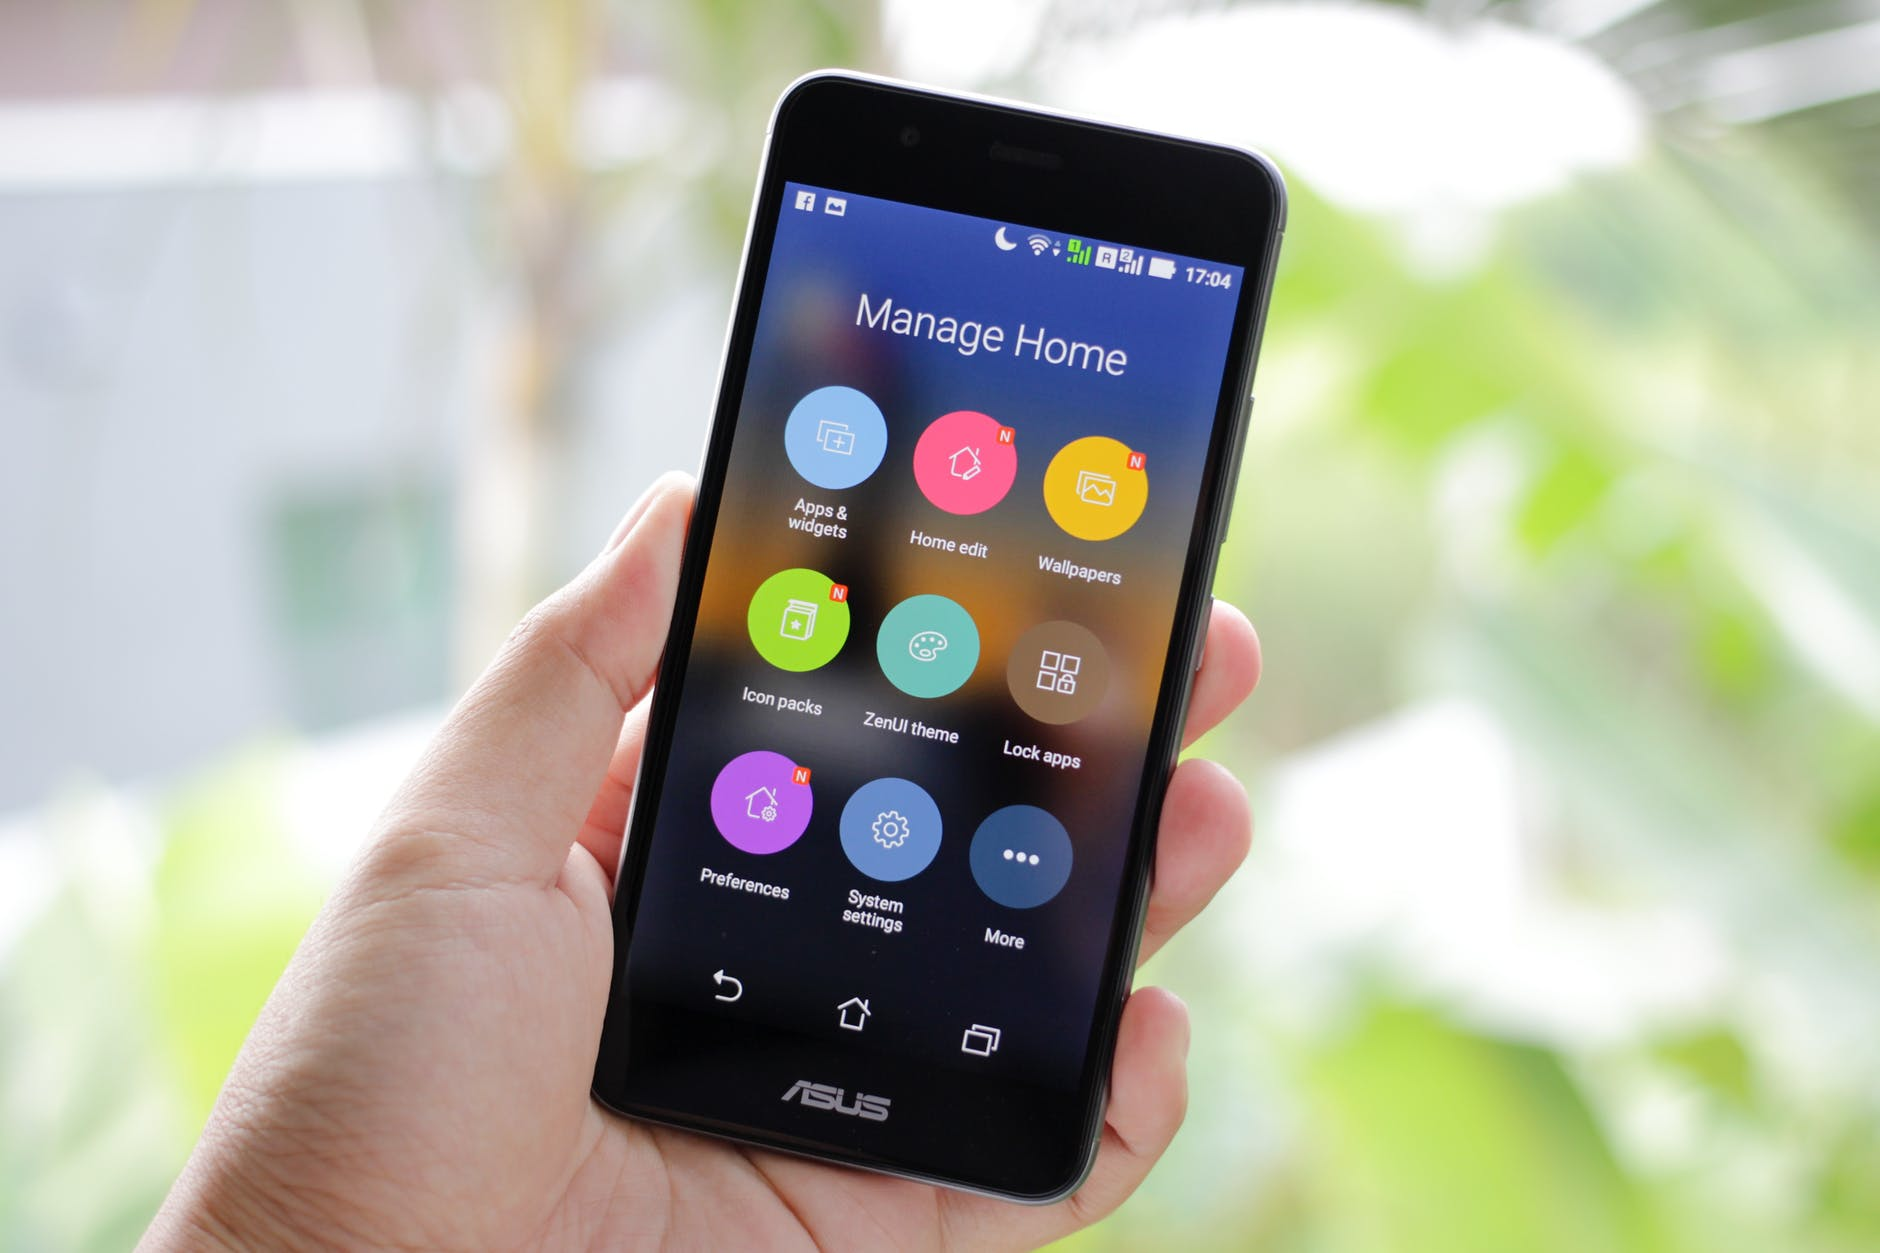

## Project Pipeline

1) Data Preprocessing

* Load the dataset and inspect the first few rows.
* Check for missing values and decide on a strategy to handle them.
* Look for any categorical variables and plan for encoding.
* Normalize or standardize numerical features if necessary.

2) Exploratory Data Analysis (EDA)

* Generate summary statistics to understand the data distribution.
* Create visualizations to uncover patterns and relationships.
* Identify any outliers or anomalies in the dataset.

3) Feature Engineering

* Create new features that might improve model performance.
* Transform features if necessary (e.g., log transformation).

4) Feature Selection

* Use statistical techniques to select a subset of relevant features.
* Employ methods like correlation analysis, Recursive Feature Elimination (RFE), or feature importance from ensemble methods.

5) Model Training and Evaluation

* Split the data into training and test sets.
* Train different models: Logistic Regression, SVM, Naive Bayes, KNN, Decision Tree, and Random Forest.
* Evaluate each model using appropriate metrics (accuracy, precision, recall, F1-score, ROC-AUC).
* Perform hyperparameter tuning if necessary.

6) Prediction

* Choose the best-performing model based on evaluation metrics.
* Make predictions on the test set.
* Interpret the results and provide insights.

## Important Library

In [3]:
#Important Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## DOMAIN ANALYSIS

  * battery_power - Total energy a battery can store in one time measured in mAh
  * blue - Has bluetooth or not
  * clock_speed - speed at which microprocessor executes instructions
  * dual_sim - Has dual sim support or not
  * fc - Front Camera mega pixels
  * four_g - Has 4G or not
  * int_memory - Internal Memory in Gigabytes
  * m_dep - Mobile Depth in cm
  * mobile_wt - Weight of mobile phone
  * n_cores - Number of cores of processor
  * pc - Primary Camera mega pixels
  * px_height - Pixel Resolution Height
  * px_width - Pixel Resolution Width 
  * ram - Random Access Memory in Megabytes
  * sc_h - Screen Height of mobile in cm
  * sc_w - Screen Width of mobile in cm
  * talk_time - longest time that a single battery charge will last when you are
  * three_g - Has 3G or not
  * touch_screen - Has touch screen or not
  * wifi - Has wifi or not
  * price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high
    cost) and 3(very high cost).

## Data Collection

In [4]:
#Import Data
data=pd.read_csv("datasets_11167_15520_train.csv")
pd.set_option("display.max_rows",None)

## Rename Columns

In [5]:
#Change table name
data=data.rename(columns={"battery_power":"Battery_Power","blue":"Bluetooth","clock_speed":"Clock_Speed","dual_sim":"Dual_Sim","fc":"Selfi_Camera","four_g":"4G","int_memory":"Internal_Memory","m_dep":"Mobile_Depth","mobile_wt":"Mobile_Width","n_cores":"Number_Of_Cores","pc":"Primary_Camera","px_height":"Pixel_Height","px_width":"Pixel_Width","ram":"RAM","sc_h":"Screen_Height","sc_w":"Screen_Width","talk_time":"Talk_Time","three_g":"3G","touch_screen":"Touch_Screen","wifi":"WiFi","price_range":"Price_Range"})

## Basic Checks

In [170]:
a=data.copy()

In [165]:
data.head(5)#Top 5

Battery_Power  Bluetooth  Clock_Speed  Dual_Sim  Selfi_Camera  4G  \
0            842          0          2.2         0             1   0   
1           1021          1          0.5         1             0   1   
2            563          1          0.5         1             2   1   
3            615          1          2.5         0             0   0   
4           1821          1          1.2         0            13   1   

   Internal_Memory  Mobile_Depth  Mobile_Width  Number_Of_Cores  ...  \
0                7           0.6           188                2  ...   
1               53           0.7           136                3  ...   
2               41           0.9           145                5  ...   
3               10           0.8           131                6  ...   
4               44           0.6           141                2  ...   

   Pixel_Height  Pixel_Width   RAM  Screen_Height  Screen_Width  Talk_Time  \
0            20          756  2549              9             7         19   
1           905         1988  2631             17             3          7   
2          1263         1716  2603             11             2          9   
3          1216         1786  2769             16             8         11   
4          1208         1212  1411              8             2         15   

   3G  Touch_Screen  WiFi  Price_Range  
0   0             0     1            1  
1   1             1     0            2  
2   1             1     0            2  
3   1             0     0            2  
4   1             1     0            1  

[5 rows x 21 columns]

In [8]:
data.tail(5)#Last 5

Battery_Power  Bluetooth  Clock_Speed  Dual_Sim  Selfi_Camera  4G  \
1995            794          1          0.5         1             0   1   
1996           1965          1          2.6         1             0   0   
1997           1911          0          0.9         1             1   1   
1998           1512          0          0.9         0             4   1   
1999            510          1          2.0         1             5   1   

      Internal_Memory  Mobile_Depth  Mobile_Width  Number_Of_Cores  ...  \
1995                2           0.8           106                6  ...   
1996               39           0.2           187                4  ...   
1997               36           0.7           108                8  ...   
1998               46           0.1           145                5  ...   
1999               45           0.9           168                6  ...   

      Pixel_Height  Pixel_Width   RAM  Screen_Height  Screen_Width  Talk_Time  \
1995          1222         1890   668             13             4         19   
1996           915         1965  2032             11            10         16   
1997           868         1632  3057              9             1          5   
1998           336          670   869             18            10         19   
1999           483          754  3919             19             4          2   

      3G  Touch_Screen  WiFi  Price_Range  
1995   1             1     0            0  
1996   1             1     1            2  
1997   1             1     0            3  
1998   1             1     1            0  
1999   1             1     1            3  

[5 rows x 21 columns]

In [9]:
data.shape #Number of row 2000 and columns 21

(2000, 21)

In [10]:
data.columns #All columns

Index(['Battery_Power', 'Bluetooth', 'Clock_Speed', 'Dual_Sim', 'Selfi_Camera',
       '4G', 'Internal_Memory', 'Mobile_Depth', 'Mobile_Width',
       'Number_Of_Cores', 'Primary_Camera', 'Pixel_Height', 'Pixel_Width',
       'RAM', 'Screen_Height', 'Screen_Width', 'Talk_Time', '3G',
       'Touch_Screen', 'WiFi', 'Price_Range'],
      dtype='object')

In [11]:
pd.set_option("display.max_rows",2000)
pd.set_option("display.max_rows",21)

In [12]:
data.info()#NO Null Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Battery_Power    2000 non-null   int64  
 1   Bluetooth        2000 non-null   int64  
 2   Clock_Speed      2000 non-null   float64
 3   Dual_Sim         2000 non-null   int64  
 4   Selfi_Camera     2000 non-null   int64  
 5   4G               2000 non-null   int64  
 6   Internal_Memory  2000 non-null   int64  
 7   Mobile_Depth     2000 non-null   float64
 8   Mobile_Width     2000 non-null   int64  
 9   Number_Of_Cores  2000 non-null   int64  
 10  Primary_Camera   2000 non-null   int64  
 11  Pixel_Height     2000 non-null   int64  
 12  Pixel_Width      2000 non-null   int64  
 13  RAM              2000 non-null   int64  
 14  Screen_Height    2000 non-null   int64  
 15  Screen_Width     2000 non-null   int64  
 16  Talk_Time        2000 non-null   int64  
 17  3G            

In [185]:
print("Minimum Range -",min(data["3G"].unique()))#Range of battery power is 501 to 1998
print("Maximam Range -",max(data["3G"].unique()))

Minimum Range - 0
Maximam Range - 1


* Battery_Power - Minimum Range - 501 , Maximam Range - 1998
* Bluetooth - Minimum Range - 0 , Maximam Range - 3.0
* Clock_Speed - Minimum Range - 0.5 , Maximam Range - 1998
* Dual_Sim - Minimum Range - 0 , Maximam Range - 1
* Selfi_Camera - Minimum Range - 0 , Maximam Range - 20
* 4G - Minimum Range - 0 , Maximam Range - 1
* Internal_Memory - Minimum Range - 2 , Maximam Range - 64
* Mobile_Depth - Minimum Range - 0.1 , Maximam Range - 1.0
* Mobile_Width - Minimum Range - 80 , Maximam Range - 200
* Number_Of_Cores - Minimum Range - 1 , Maximam Range - 8
* Primary_Camera - Minimum Range - 0 , Maximam Range - 20
* Pixel_Height - Minimum Range - 0 , Maximam Range - 1960
* Pixel_Width - Minimum Range - 500 , Maximam Range - 1998
* RAM - Minimum Range - 256 , Maximam Range - 3998
* Screen_Height - Minimum Range - 5 , Maximam Range - 19
* Screen_Width - Minimum Range - 0 , Maximam Range - 18
* Talk_Time - Minimum Range - 501 , Maximam Range - 20
* 3G - Minimum Range - 0 , Maximam Range - 1
* Touch_Screen - Minimum Range - 0 , Maximam Range - 1
* WiFi - Minimum Range - 0 , Maximam Range - 1
* Price_Range - Minimum Range - 0 , Maximam Range - 3

In [14]:
data.describe()#Statistical Summary

Battery_Power  Bluetooth  Clock_Speed     Dual_Sim  Selfi_Camera  \
count    2000.000000  2000.0000  2000.000000  2000.000000   2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500      4.309500   
std       439.418206     0.5001     0.816004     0.500035      4.341444   
min       501.000000     0.0000     0.500000     0.000000      0.000000   
25%       851.750000     0.0000     0.700000     0.000000      1.000000   
50%      1226.000000     0.0000     1.500000     1.000000      3.000000   
75%      1615.250000     1.0000     2.200000     1.000000      7.000000   
max      1998.000000     1.0000     3.000000     1.000000     19.000000   

                4G  Internal_Memory  Mobile_Depth  Mobile_Width  \
count  2000.000000      2000.000000   2000.000000   2000.000000   
mean      0.521500        32.046500      0.501750    140.249000   
std       0.499662        18.145715      0.288416     35.399655   
min       0.000000         2.000000      0.100000     80.000000   
25%       0.000000        16.000000      0.200000    109.000000   
50%       1.000000        32.000000      0.500000    141.000000   
75%       1.000000        48.000000      0.800000    170.000000   
max       1.000000        64.000000      1.000000    200.000000   

       Number_Of_Cores  ...  Pixel_Height  Pixel_Width          RAM  \
count      2000.000000  ...   2000.000000  2000.000000  2000.000000   
mean          4.520500  ...    645.108000  1251.515500  2124.213000   
std           2.287837  ...    443.780811   432.199447  1084.732044   
min           1.000000  ...      0.000000   500.000000   256.000000   
25%           3.000000  ...    282.750000   874.750000  1207.500000   
50%           4.000000  ...    564.000000  1247.000000  2146.500000   
75%           7.000000  ...    947.250000  1633.000000  3064.500000   
max           8.000000  ...   1960.000000  1998.000000  3998.000000   

       Screen_Height  Screen_Width    Talk_Time           3G  Touch_Screen  \
count    2000.000000   2000.000000  2000.000000  2000.000000   2000.000000   
mean       12.306500      5.767000    11.011000     0.761500      0.503000   
std         4.213245      4.356398     5.463955     0.426273      0.500116   
min         5.000000      0.000000     2.000000     0.000000      0.000000   
25%         9.000000      2.000000     6.000000     1.000000      0.000000   
50%        12.000000      5.000000    11.000000     1.000000      1.000000   
75%        16.000000      9.000000    16.000000     1.000000      1.000000   
max        19.000000     18.000000    20.000000     1.000000      1.000000   

              WiFi  Price_Range  
count  2000.000000  2000.000000  
mean      0.507000     1.500000  
std       0.500076     1.118314  
min       0.000000     0.000000  
25%       0.000000     0.750000  
50%       1.000000     1.500000  
75%       1.000000     2.250000  
max       1.000000     3.000000  

[8 rows x 21 columns]

In [15]:
data.describe().T #Change row and coumns position

count        mean          std    min      25%     50%  \
Battery_Power    2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
Bluetooth        2000.0     0.49500     0.500100    0.0     0.00     0.0   
Clock_Speed      2000.0     1.52225     0.816004    0.5     0.70     1.5   
Dual_Sim         2000.0     0.50950     0.500035    0.0     0.00     1.0   
Selfi_Camera     2000.0     4.30950     4.341444    0.0     1.00     3.0   
4G               2000.0     0.52150     0.499662    0.0     0.00     1.0   
Internal_Memory  2000.0    32.04650    18.145715    2.0    16.00    32.0   
Mobile_Depth     2000.0     0.50175     0.288416    0.1     0.20     0.5   
Mobile_Width     2000.0   140.24900    35.399655   80.0   109.00   141.0   
Number_Of_Cores  2000.0     4.52050     2.287837    1.0     3.00     4.0   
Primary_Camera   2000.0     9.91650     6.064315    0.0     5.00    10.0   
Pixel_Height     2000.0   645.10800   443.780811    0.0   282.75   564.0   
Pixel_Width      2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
RAM              2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
Screen_Height    2000.0    12.30650     4.213245    5.0     9.00    12.0   
Screen_Width     2000.0     5.76700     4.356398    0.0     2.00     5.0   
Talk_Time        2000.0    11.01100     5.463955    2.0     6.00    11.0   
3G               2000.0     0.76150     0.426273    0.0     1.00     1.0   
Touch_Screen     2000.0     0.50300     0.500116    0.0     0.00     1.0   
WiFi             2000.0     0.50700     0.500076    0.0     0.00     1.0   
Price_Range      2000.0     1.50000     1.118314    0.0     0.75     1.5   

                     75%     max  
Battery_Power    1615.25  1998.0  
Bluetooth           1.00     1.0  
Clock_Speed         2.20     3.0  
Dual_Sim            1.00     1.0  
Selfi_Camera        7.00    19.0  
4G                  1.00     1.0  
Internal_Memory    48.00    64.0  
Mobile_Depth        0.80     1.0  
Mobile_Width      170.00   200.0  
Number_Of_Cores     7.00     8.0  
Primary_Camera     15.00    20.0  
Pixel_Height      947.25  1960.0  
Pixel_Width      1633.00  1998.0  
RAM              3064.50  3998.0  
Screen_Height      16.00    19.0  
Screen_Width        9.00    18.0  
Talk_Time          16.00    20.0  
3G                  1.00     1.0  
Touch_Screen        1.00     1.0  
WiFi                1.00     1.0  
Price_Range         2.25     3.0

In [16]:
#data.describe(include='O')# No categorical columns

In [17]:
data.duplicated().sum()#No duplicate value

0

In [18]:
data["Price_Range"].value_counts()

Price_Range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [19]:
data.columns

Index(['Battery_Power', 'Bluetooth', 'Clock_Speed', 'Dual_Sim', 'Selfi_Camera',
       '4G', 'Internal_Memory', 'Mobile_Depth', 'Mobile_Width',
       'Number_Of_Cores', 'Primary_Camera', 'Pixel_Height', 'Pixel_Width',
       'RAM', 'Screen_Height', 'Screen_Width', 'Talk_Time', '3G',
       'Touch_Screen', 'WiFi', 'Price_Range'],
      dtype='object')

In [20]:
print(data.nunique().sort_values(ascending=False))

RAM                1562
Pixel_Height       1137
Pixel_Width        1109
Battery_Power      1094
Mobile_Width        121
Internal_Memory      63
Clock_Speed          26
Primary_Camera       21
Selfi_Camera         20
Screen_Width         19
Talk_Time            19
Screen_Height        15
Mobile_Depth         10
Number_Of_Cores       8
Price_Range           4
Bluetooth             2
4G                    2
Dual_Sim              2
3G                    2
Touch_Screen          2
WiFi                  2
dtype: int64


In [21]:
data.dtypes#Types of data

Battery_Power        int64
Bluetooth            int64
Clock_Speed        float64
Dual_Sim             int64
Selfi_Camera         int64
4G                   int64
Internal_Memory      int64
Mobile_Depth       float64
Mobile_Width         int64
Number_Of_Cores      int64
Primary_Camera       int64
Pixel_Height         int64
Pixel_Width          int64
RAM                  int64
Screen_Height        int64
Screen_Width         int64
Talk_Time            int64
3G                   int64
Touch_Screen         int64
WiFi                 int64
Price_Range          int64
dtype: object

In [22]:
data.isnull().sum()#NO Missing Value

Battery_Power      0
Bluetooth          0
Clock_Speed        0
Dual_Sim           0
Selfi_Camera       0
4G                 0
Internal_Memory    0
Mobile_Depth       0
Mobile_Width       0
Number_Of_Cores    0
Primary_Camera     0
Pixel_Height       0
Pixel_Width        0
RAM                0
Screen_Height      0
Screen_Width       0
Talk_Time          0
3G                 0
Touch_Screen       0
WiFi               0
Price_Range        0
dtype: int64

## Insight

* FROM describe() function:gives Statistics Summary- -Statistics summary gives a high-level idea to identify
  whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed
  or left/right skewness.
* Battery_Power,Bluetooth,Clock_Speed,Dual_Sim,Selfi_Camera,4G,Internal_Memory,Mobile_Depth,Mobile_Width,Number_Of_Cores,
  Primary_Camera,Pixel_Height,Pixel_Width,RAM,Screen_Height,Screen_Width,Talk_Time,3G,Touch_Screen,WiFi,Price_Range overall data   null value is not present,Data is normally distributed,no error,but in selfi camera have some outlier,and we can see ram and     battery is highly correlated

##  EXPLORATORY DATA ANALYSIS 

-Using EDA :Visualize fesatures, insight /observation from the data

* Missing Values
* All The Numerical Variables
* Distribution of the Numerical Variables
* Categorical Variables
* Cardinality of Categorical Variables
* Outliers

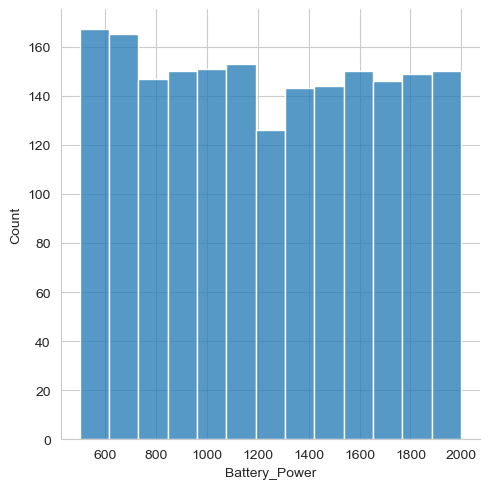

In [192]:
sns.displot(data["Battery_Power"]) #displot always use for the continous data
plt.show()

## Insight
* The range of battery_power are 600 to 2000 
* The range of 600 mah battery are widely used
* The range of 1200 Mah battery are very less used

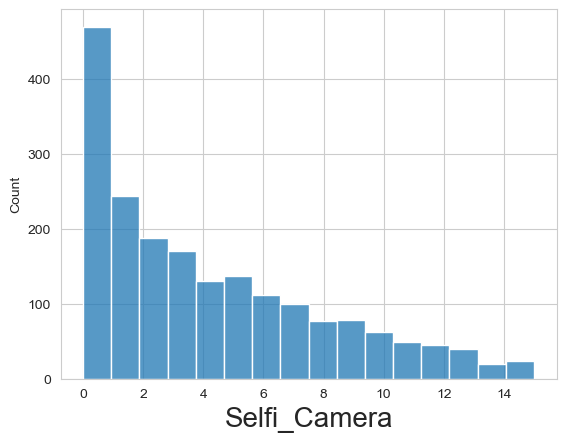

In [193]:
sns.histplot(x='Selfi_Camera',data=data)
plt.xlabel('Selfi_Camera',fontsize=20)
plt.show()

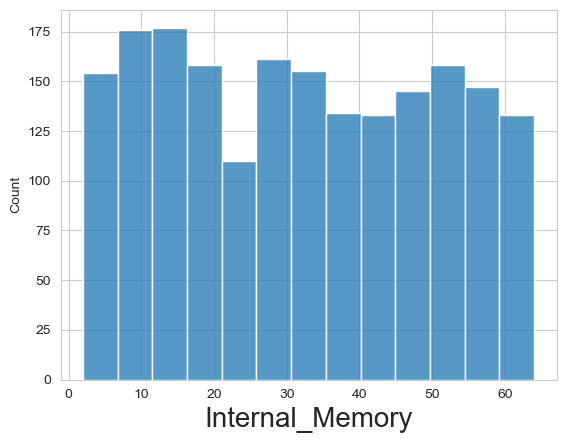

In [194]:
sns.histplot(x='Internal_Memory',data=data)
plt.xlabel('Internal_Memory',fontsize=20)
plt.show()

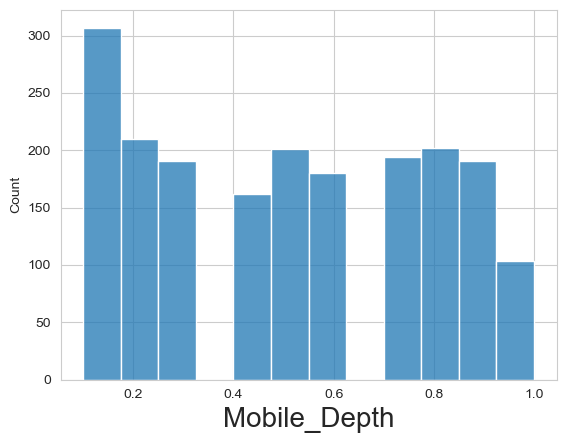

In [195]:
sns.histplot(x='Mobile_Depth',data=data)
plt.xlabel('Mobile_Depth',fontsize=20)
plt.show()

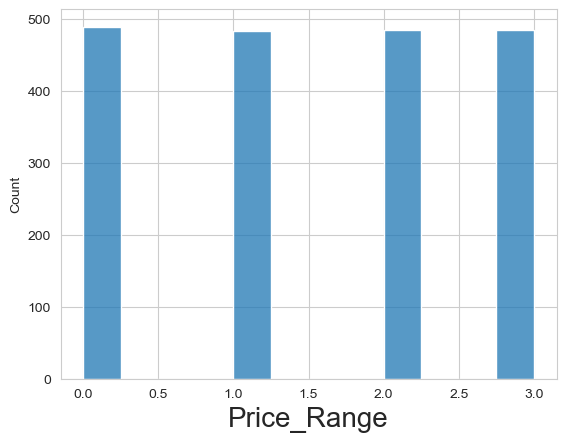

In [196]:
sns.histplot(x='Price_Range',data=data)
plt.xlabel('Price_Range',fontsize=20)
plt.show()

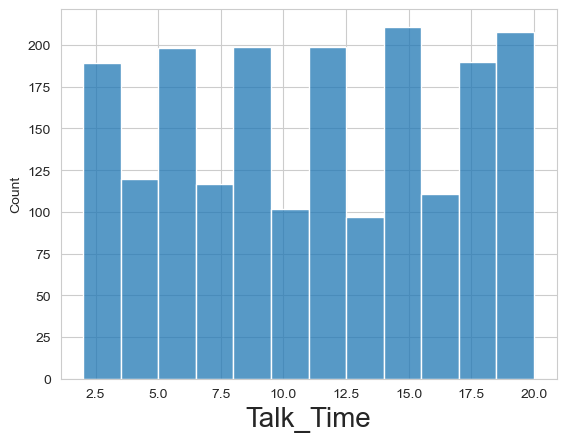

In [197]:
sns.histplot(x='Talk_Time',data=data)
plt.xlabel('Talk_Time',fontsize=20)
plt.show()

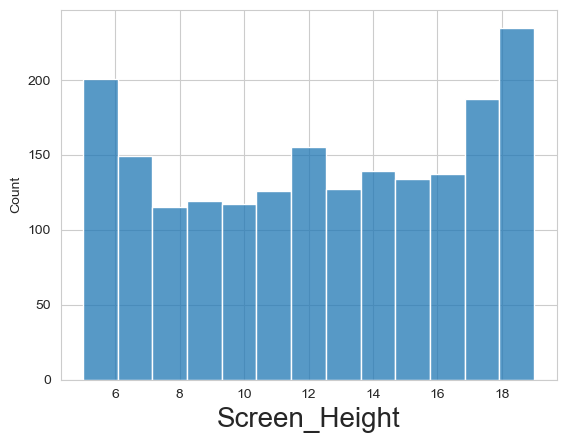

In [198]:
sns.histplot(x='Screen_Height',data=data)
plt.xlabel('Screen_Height',fontsize=20)
plt.show()

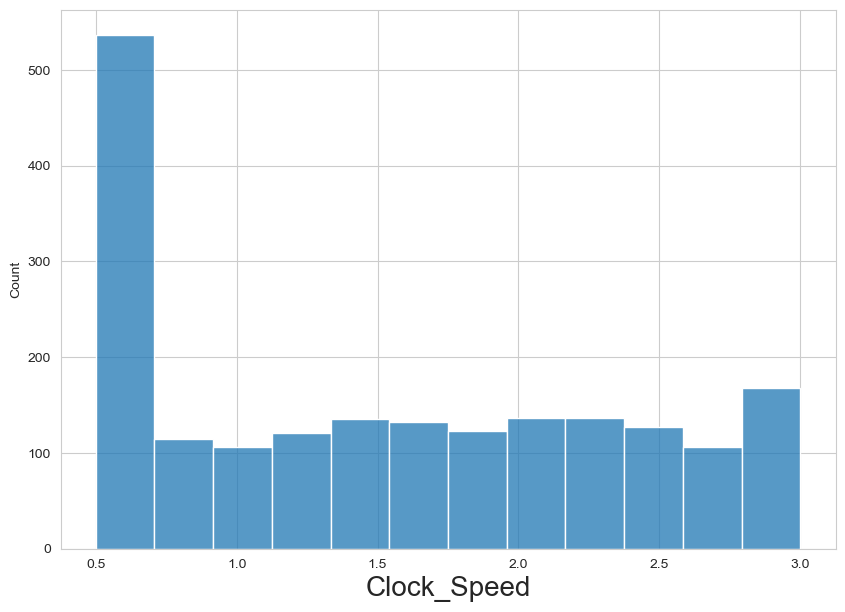

In [186]:
sns.histplot(x='Clock_Speed',data=data)
plt.xlabel('Clock_Speed',fontsize=20)
plt.show()

## Insight
* There is high Correlation between the primary camera and selfi camera (Primary camera and selfi camera - 64% )
* 4G and 3G also have good correlation (4G and 3G : 58%)
* there is highest correlation between the RAM and Price range- 92%

## Barplot

In [25]:
sns.set_style('whitegrid')# Identify numeric features correlated with 'price_range'
correlated_features = data.corr()['Price_Range'].sort_values(ascending=False)

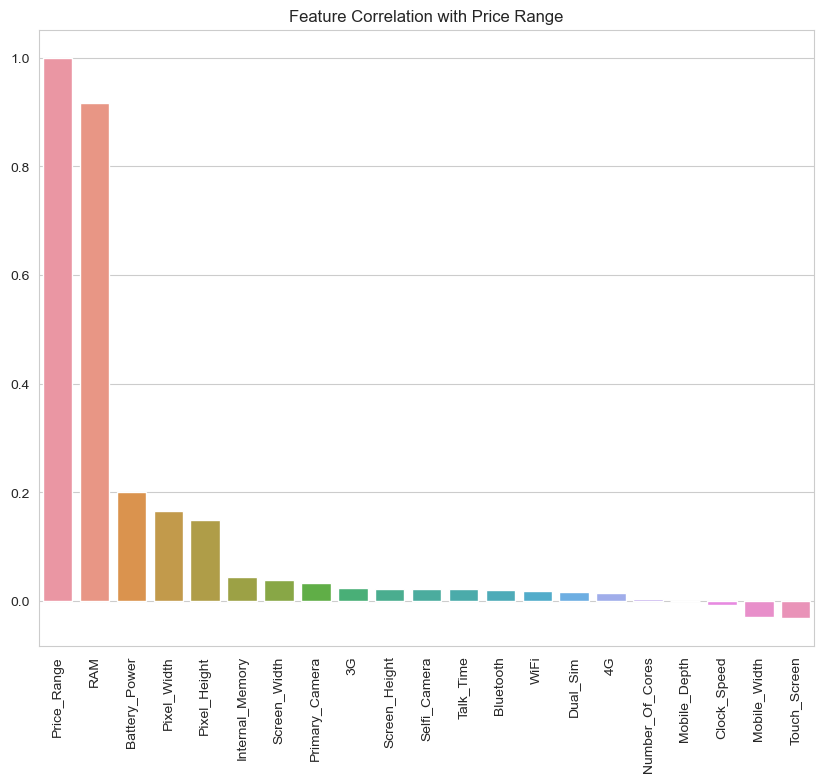

In [26]:
# bar plot for the correlation of numeric features with 'price_range'
plt.figure(figsize=(10, 8))
sns.barplot(x=correlated_features.index, y=correlated_features.values)
plt.xticks(rotation=90)
plt.title('Feature Correlation with Price Range')
plt.show()

## Insight
-Top 5 
* This is graphical representation of how feature is correlated with price range.
* Price range,RAM,Battery Pixel_width,Pixle_hight this top5 feature is highly correlated
* Many more

## Pairplot

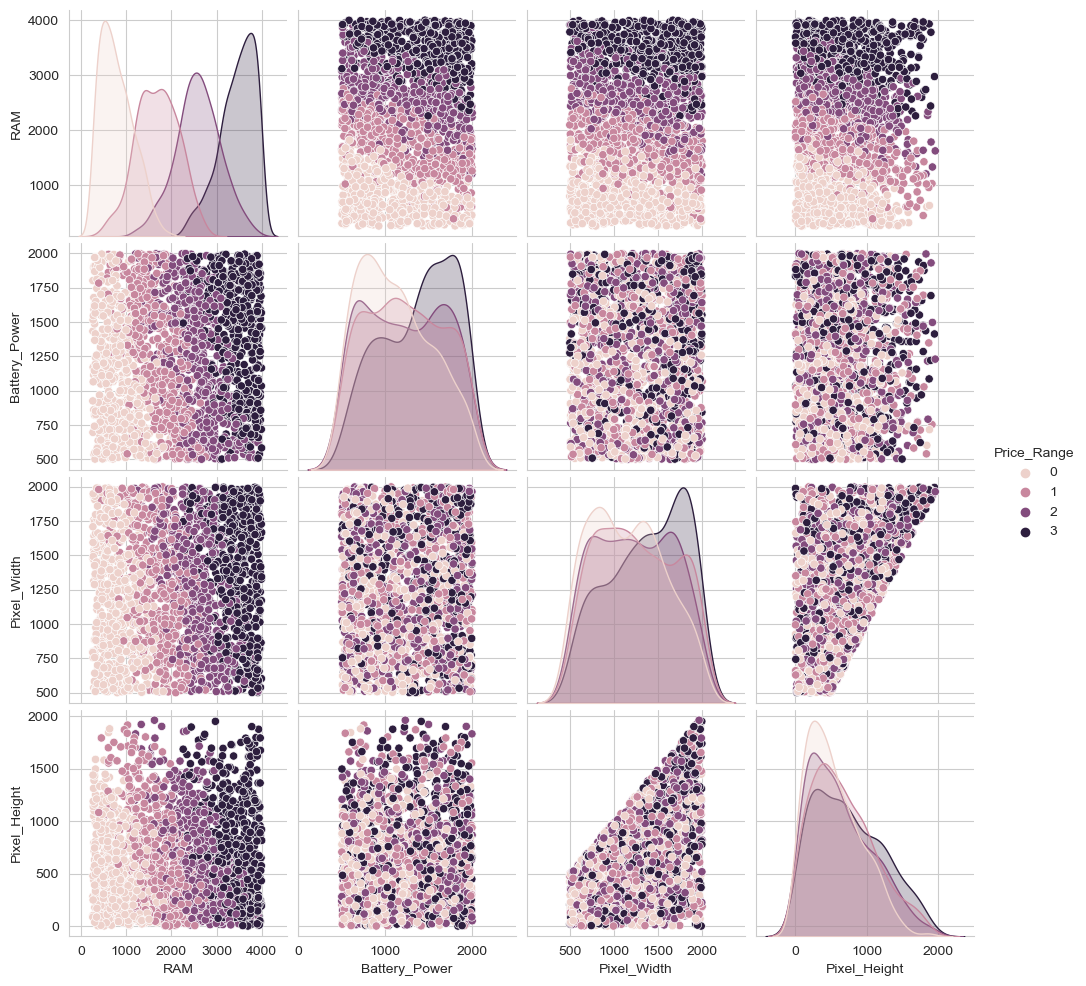

In [27]:
# Multivariate Analysis
# Pairplot for the most correlated features with 'price_range'
most_correlated_features = correlated_features.index[1:5] # Skip the first one as it is 'price_range' itself
sns.pairplot(data, vars=most_correlated_features, hue='Price_Range')
plt.show()

## Data Pre-Processing

* Data preprocessing- is the process of cleaning and preparing the raw data to enable feature
  engineering.
* Feature Engineering covers various data engineering techniques such as adding/removing
  relevant features, handling missing data, encoding the data, handling categorical variables,
  etc
* handling missing values
* handling outliers
* drop duplicates
* handling categorical varaibles
* scaling

In [28]:
#sum of missing data
data.isnull().sum().sort_values(ascending=False)#Data is clean

Battery_Power      0
Pixel_Height       0
WiFi               0
Touch_Screen       0
3G                 0
Talk_Time          0
Screen_Width       0
Screen_Height      0
RAM                0
Pixel_Width        0
Primary_Camera     0
Bluetooth          0
Number_Of_Cores    0
Mobile_Width       0
Mobile_Depth       0
Internal_Memory    0
4G                 0
Selfi_Camera       0
Dual_Sim           0
Clock_Speed        0
Price_Range        0
dtype: int64

* No missing data

In [29]:
data.duplicated().sum()#No duplicate value

0

* No duplicates data

## Check outlier

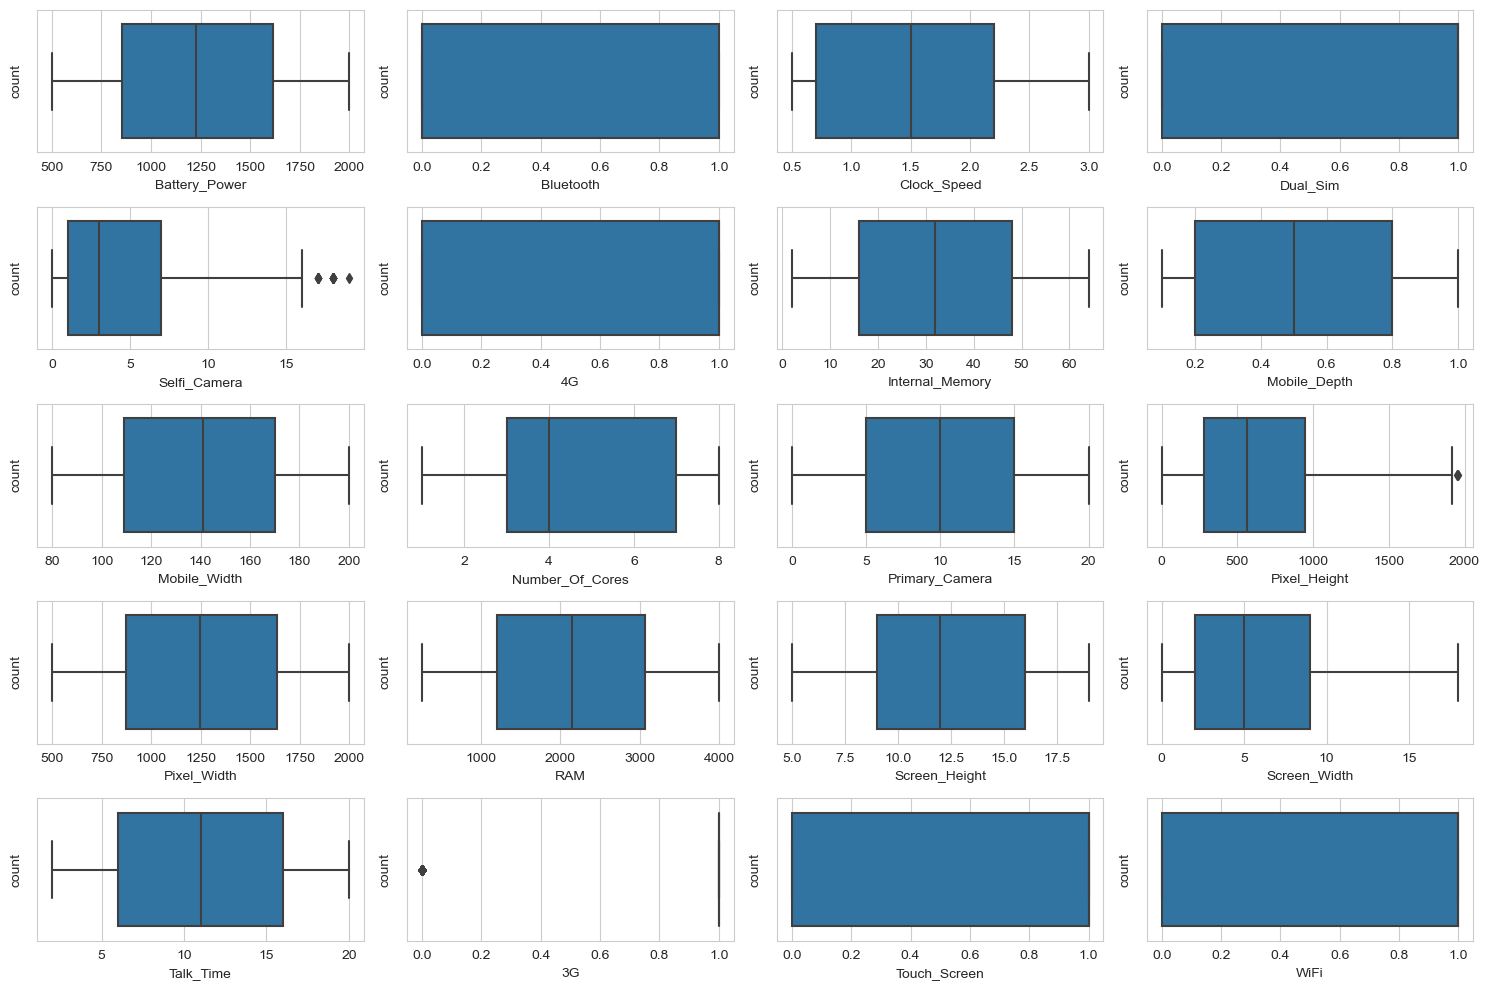

In [30]:
plt.figure(figsize=(15,10),facecolor="White")
plotnumber=1
for column in data.drop("Price_Range",axis=1):
    if plotnumber<21:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
        plotnumber+=1
    plt.tight_layout()

## Insight 
* Out of all these feature we found out selfi camera and Pixel_Height have outlier
* Other wise all feature are good

### OUTLIER DETECTION AND REMOVAL : MOST IMP

* Removing outliers is important step in data analysis. # However, while removing outliers in ML we should be
  careful, because we do not know if there are not any outliers in test set.
* checked the outliers then decide to drop outliers or handle the outliers.


<Axes: xlabel='Selfi_Camera'>

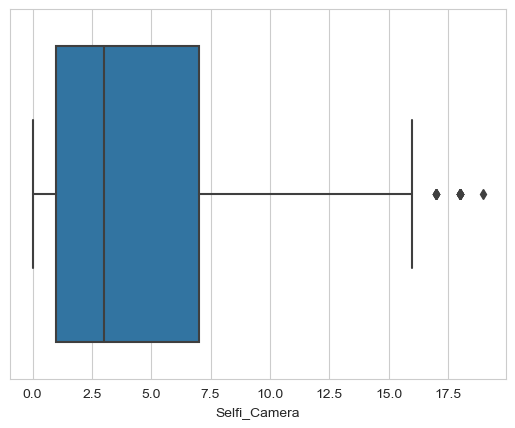

In [31]:
sns.boxplot(x="Selfi_Camera",data=data)#We found the outlier

In [32]:
data.drop(data.loc[data["Selfi_Camera"]>15].index,axis=0,inplace=True)# Remove these outlier

<Axes: xlabel='Selfi_Camera'>

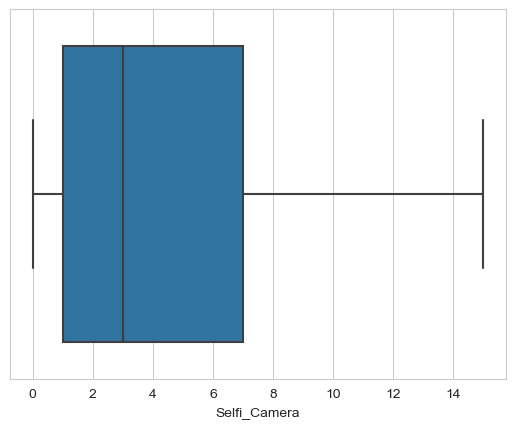

In [33]:
sns.boxplot(x="Selfi_Camera",data=data)#No outlier present

<Axes: xlabel='Pixel_Height'>

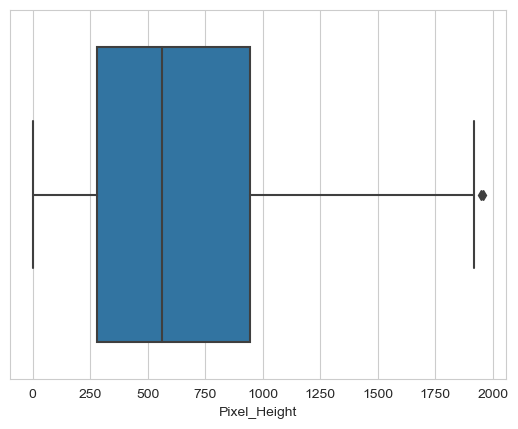

In [34]:
sns.boxplot(x="Pixel_Height",data=data)#We found the outlier

In [35]:
data.drop(data.loc[data["Pixel_Height"]>1800].index,axis=0,inplace=True)# Remove these outlier

<Axes: xlabel='Pixel_Height'>

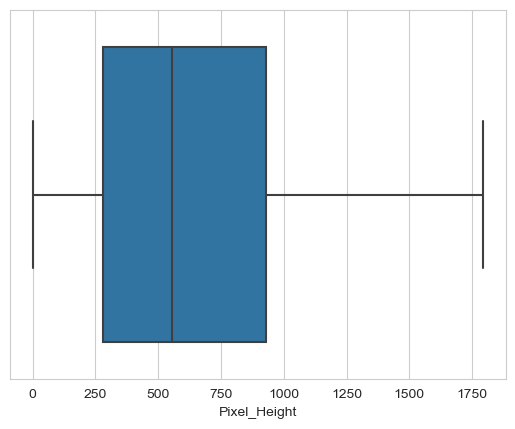

In [36]:
sns.boxplot(x="Pixel_Height",data=data)#No outlier present

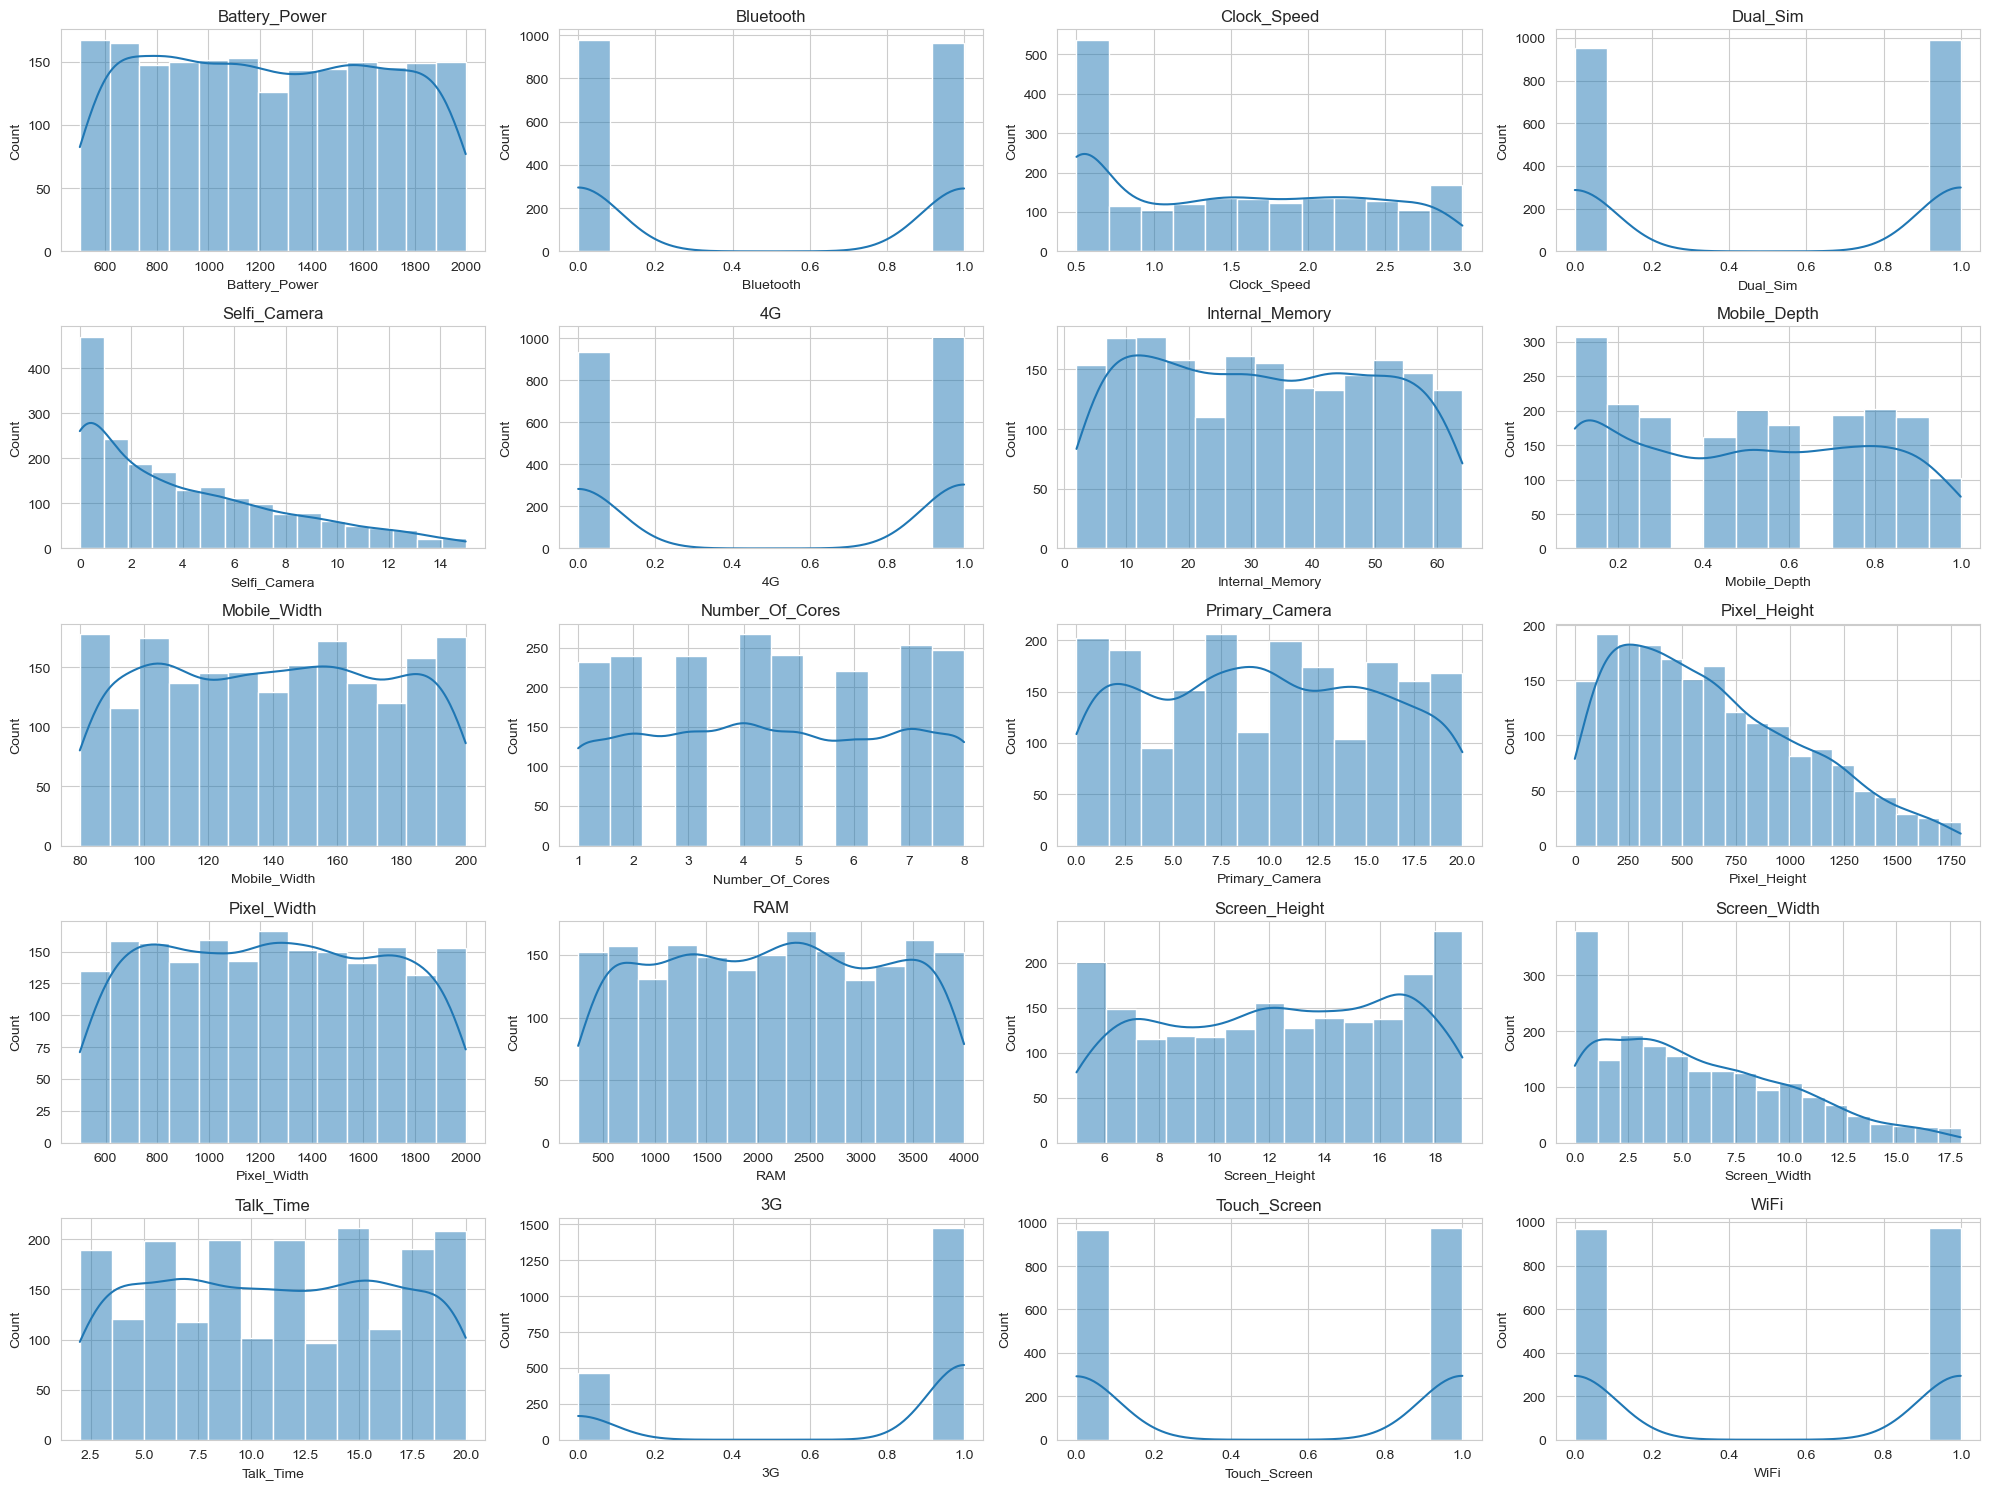

In [37]:
# Univariate Analysis
# Histograms for all numeric features
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.drop('Price_Range', axis=1).columns, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

## Insight

* Battery Power: Shows a fairly uniform distribution, indicating that battery capacity varies widely across the mobile phones.
* Bluetooth: Indicates a nearly balanced presence of Bluetooth capability across the dataset.
* Clock Speed: Suggests that most phones have lower clock speeds, with fewer phones having high clock speeds.
* Dual SIM: Shows that dual SIM functionality is quite common among the phones.
* Front Camera Megapixels: Reveals a right-skewed distribution, meaning most phones have lower front camera megapixels.
* 4G: Highlights that a significant number of phones support 4G.
* Internal Memory: Displays a wide distribution, suggesting varied internal storage options.
* Mobile Depth: Indicates a concentration of phones with slimmer profiles.
* Mobile Weight: Shows a broad distribution, implying a variety of phone weights.
* Number of Cores: Suggests that phones with 2 to 4 cores are most common, with fewer phones having higher core counts.
* Primary Camera Megapixels: Also right-skewed, similar to the front camera, with most phones having lower megapixels.
* Pixel Resolution Height and Width: Shows varied pixel resolutions, with a slight right skew indicating some phones have very   high resolutions.
* RAM: Displays a wide range of RAM sizes, with a concentration at the lower end.
* Screen Height and Width: Indicates a variety of screen sizes, with a tendency towards larger screens.
* Talk Time: Shows a broad range of battery life as measured by talk time.
* 3G and 4G: Reflects the availability of 3G and 4G across the dataset, with a large number of phones supporting these           technologies.
* Touch Screen: Shows that touch screen functionality is common.
* WiFi: Indicates that WiFi capability is also common among the phones.
* These distributions help in understanding the range and commonality of features in mobile phones, which can be crucial for     market segmentation and targeting specific customer groups.

## Feature Selection : PCA

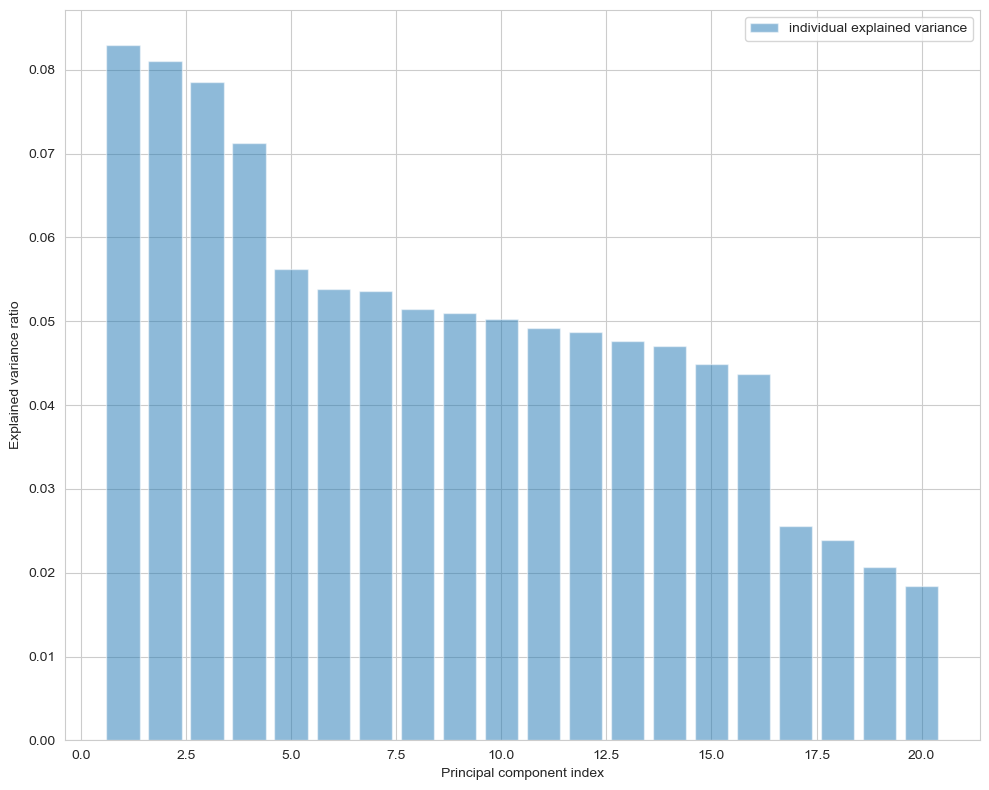

Most important features for prediction according to PCA:
Selfi_Camera
Primary_Camera
Talk_Time
Mobile_Width
Mobile_Depth
Battery_Power
Clock_Speed
Bluetooth
RAM
Number_Of_Cores
Touch_Screen
Dual_Sim
WiFi
Internal_Memory
Pixel_Width
Pixel_Height
Screen_Height
Screen_Width
3G
4G


In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Price_Range', axis=1))
pca = PCA(n_components=20)
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Get the most important features according to the first principal component
most_important_features_indices = np.argsort(-pca.components_[0])
most_important_features = [data.drop('Price_Range', axis=1).columns[i] for i in most_important_features_indices]
plt.figure(figsize=(10, 8))
plt.bar(range(1, 21), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Print the most important features
print('Most important features for prediction according to PCA:')
for feature in most_important_features:
    print(feature)

In [39]:
# Calculate the percentage of variance explained by each feature
feature_importance = 100 * pca.explained_variance_ratio_ / np.sum(pca.explained_variance_ratio_)
feature_importance_df = pd.DataFrame({'Feature': data.drop('Price_Range', axis=1).columns,
                                      'Importance': feature_importance})
feature_importance_df

Feature  Importance
0     Battery_Power    8.298955
1         Bluetooth    8.108401
2       Clock_Speed    7.853807
3          Dual_Sim    7.125768
4      Selfi_Camera    5.624929
5                4G    5.389055
6   Internal_Memory    5.357466
7      Mobile_Depth    5.147791
8      Mobile_Width    5.093749
9   Number_Of_Cores    5.026164
10   Primary_Camera    4.916392
11     Pixel_Height    4.869660
12      Pixel_Width    4.762073
13              RAM    4.708604
14    Screen_Height    4.493978
15     Screen_Width    4.368212
16        Talk_Time    2.558442
17               3G    2.393173
18     Touch_Screen    2.066645
19             WiFi    1.836738

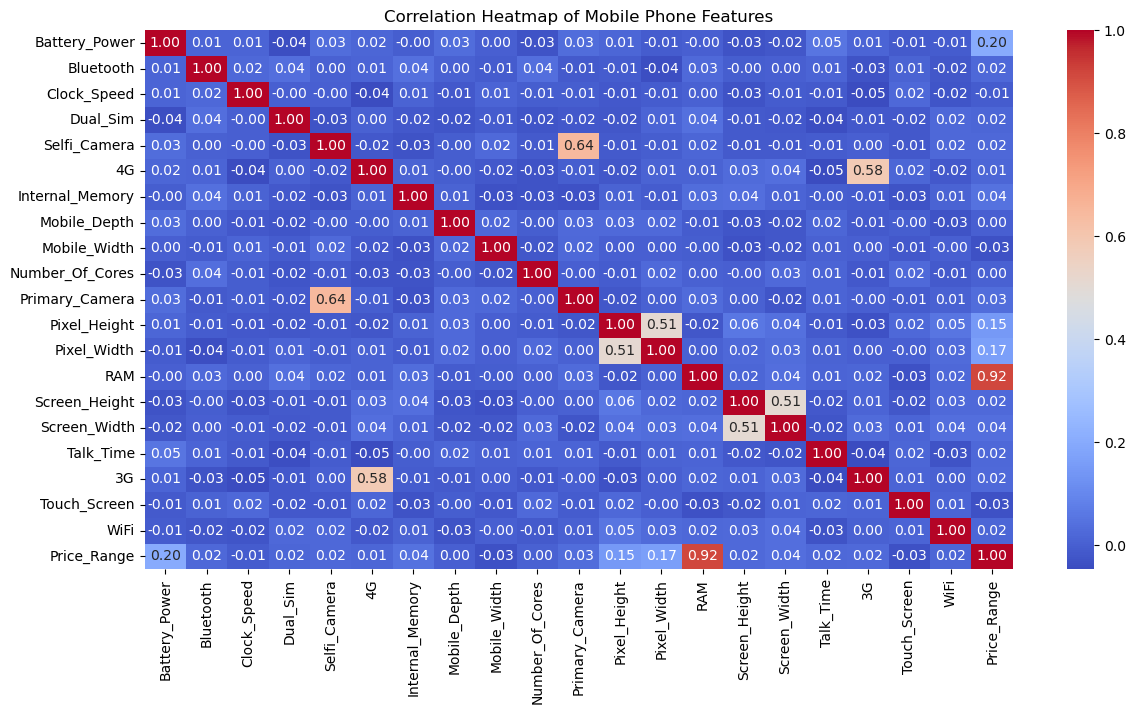

In [24]:
# Create a correlation heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Mobile Phone Features')
plt.show()

* The table above lists the features of the mobile phones along with their respective importance percentages as determined by PCA. 
* These percentages indicate how much of the variance in the dataset each feature explains, which is a proxy for their importance in predicting the price range. 
* The feature battery_power is the most important explaining approximately 8.39% of the variance followed by (Bluetooth) at about 8.06%, and clock_speed at roughly 7.88%.
* The least important feature is wifi explaining about 1.78% of the variance

* Cross-validation
* hyperparameter tuning Grid-searchCV , RandomSearchCV
* L1,L2 Regularization

## Model Prediction

* Model prediction is the process of using a trained predictive model to estimate the output variable for a new or unseen input variable Model prediction is useful for making decisions, evaluating scenarios, and forecasting future events

In [40]:
x=data.drop("Price_Range",axis=1) #Independent Feature
y=data.Price_Range #dependent feature

## Split Data

In [41]:
#Preparing Training and Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
Prediction_of_testdata=model.predict(x_test)#Test Prediction
x_train_pred=model.predict(x_train)#Tranning Prediction

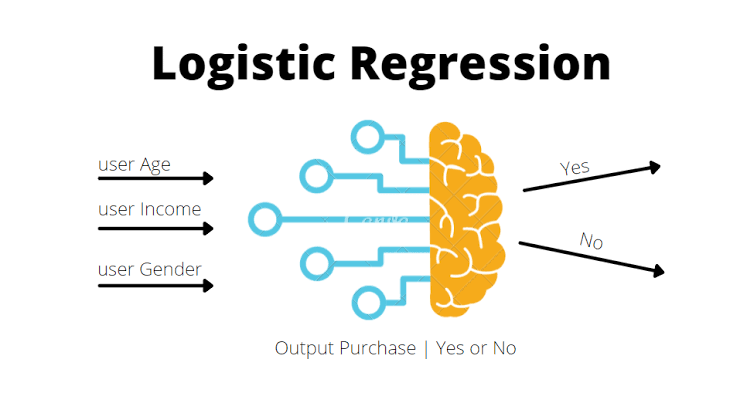

### Evaluate the models

In [44]:
print("Test Accuracy : " ,accuracy_score(y_test,Prediction_of_testdata))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_pred))#Tranning Accuracy

Test Accuracy :  0.6555269922879178
Traning Accuracy :  0.6288659793814433


LogisticRegression Accuracy Score:  0.6555269922879178
              precision    recall  f1-score   support

           0       0.86      0.70      0.78       108
           1       0.53      0.61      0.57        95
           2       0.53      0.51      0.52        90
           3       0.72      0.78      0.75        96

    accuracy                           0.66       389
   macro avg       0.66      0.65      0.65       389
weighted avg       0.67      0.66      0.66       389



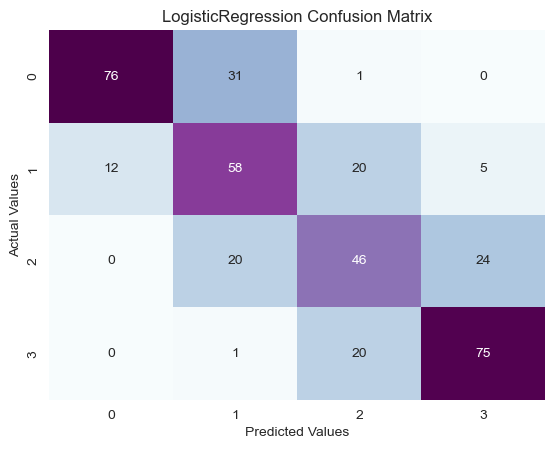

In [45]:
def my_confusion_matrix(y_test, Prediction_of_testdata, plt_title):
    cm=confusion_matrix(y_test, Prediction_of_testdata)
    print(classification_report(y_test, Prediction_of_testdata))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print('LogisticRegression Accuracy Score: ',accuracy_score(y_test,Prediction_of_testdata))
cm_rfc=my_confusion_matrix(y_test, Prediction_of_testdata, 'LogisticRegression Confusion Matrix')

* Logistic Regression work well with Both Binary classification problem and Multiclass Classification problem However, we did not get good accuracy

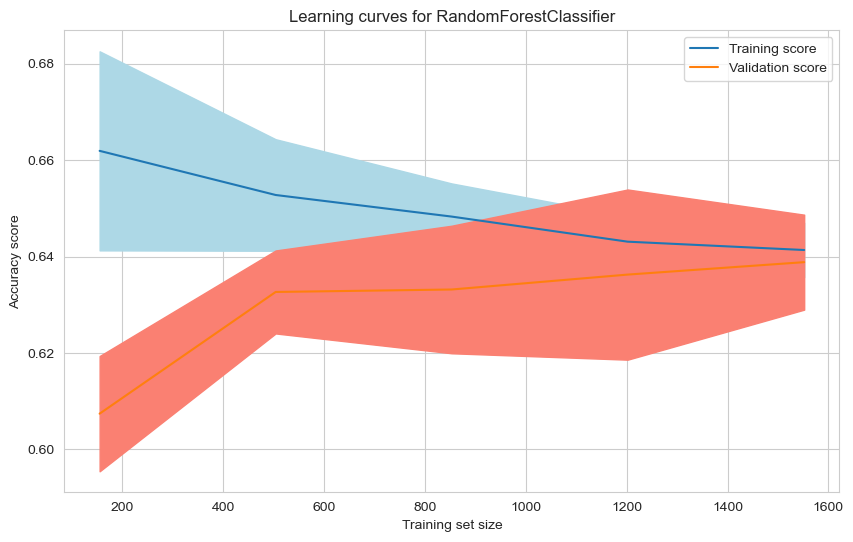

In [46]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(model, x, y, scoring="accuracy")
scoring = 'accuracy'
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='salmon')
plt.title('Learning curves for RandomForestClassifier')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

* If the training and validation scores are both low and close to each other, the model is underfitting. This means the model is too simple and cannot learn the complexity of the data. You can try to increase the model complexity, add more features, or reduce the regularization

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1,min_samples_split=30,splitter="random")#object creation for decision tree  
dt.fit(x_train,y_train)#training the model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=30,
                       splitter='random')

In [48]:
Prediction_of_DT=dt.predict(x_test)#Test Prediction
x_train_preDT=dt.predict(x_train)#Traning Prediction

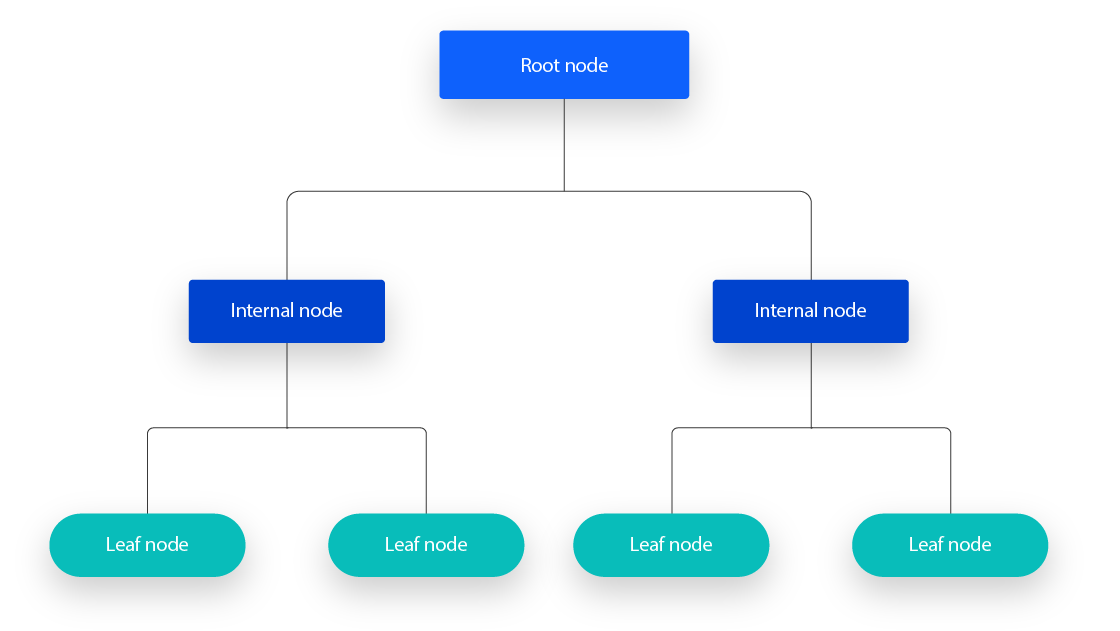

### Evaluate the models

In [49]:
print("Test Accuracy : " ,accuracy_score(y_test,Prediction_of_DT))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preDT))#Traning Accuracy

Test Accuracy :  0.8329048843187661
Traning Accuracy :  0.8569587628865979


 DecisionTree Classifier Accuracy Score:  0.8329048843187661
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       108
           1       0.74      0.77      0.76        95
           2       0.76      0.71      0.74        90
           3       0.91      0.91      0.91        96

    accuracy                           0.83       389
   macro avg       0.83      0.83      0.83       389
weighted avg       0.83      0.83      0.83       389



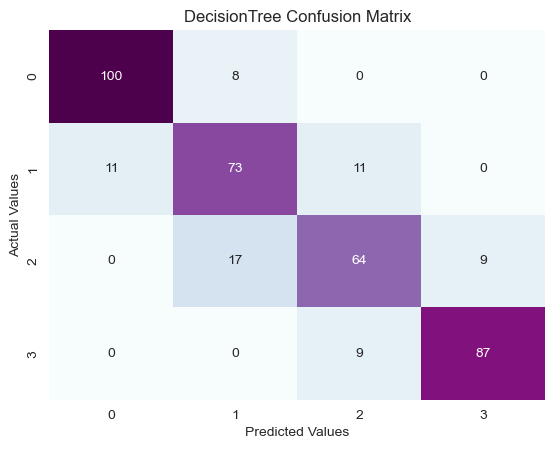

In [50]:
def my_confusion_matrix(y_test, Prediction_of_DT, plt_title):
    cm=confusion_matrix(y_test, Prediction_of_DT)
    print(classification_report(y_test, Prediction_of_DT))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' DecisionTree Classifier Accuracy Score: ',accuracy_score(y_test,Prediction_of_DT))
cm_rfc=my_confusion_matrix(y_test, Prediction_of_DT, 'DecisionTree Confusion Matrix')

* We got good accuracy when we used DecisionTree beacause Decision Tree select best Leaf Nodes And train models thats why we got 83% Accuracy

## Random Forest Classifier

In [51]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,max_depth= 7,max_features= 15,min_samples_leaf= 3,min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [52]:
#Now, we do the training and prediction.
rfc.fit(x_train, y_train)
y_pred_rfc=rfc.predict(x_test)#Test prediction 
x_train_preRFC=rfc.predict(x_train)#Traning Prediction

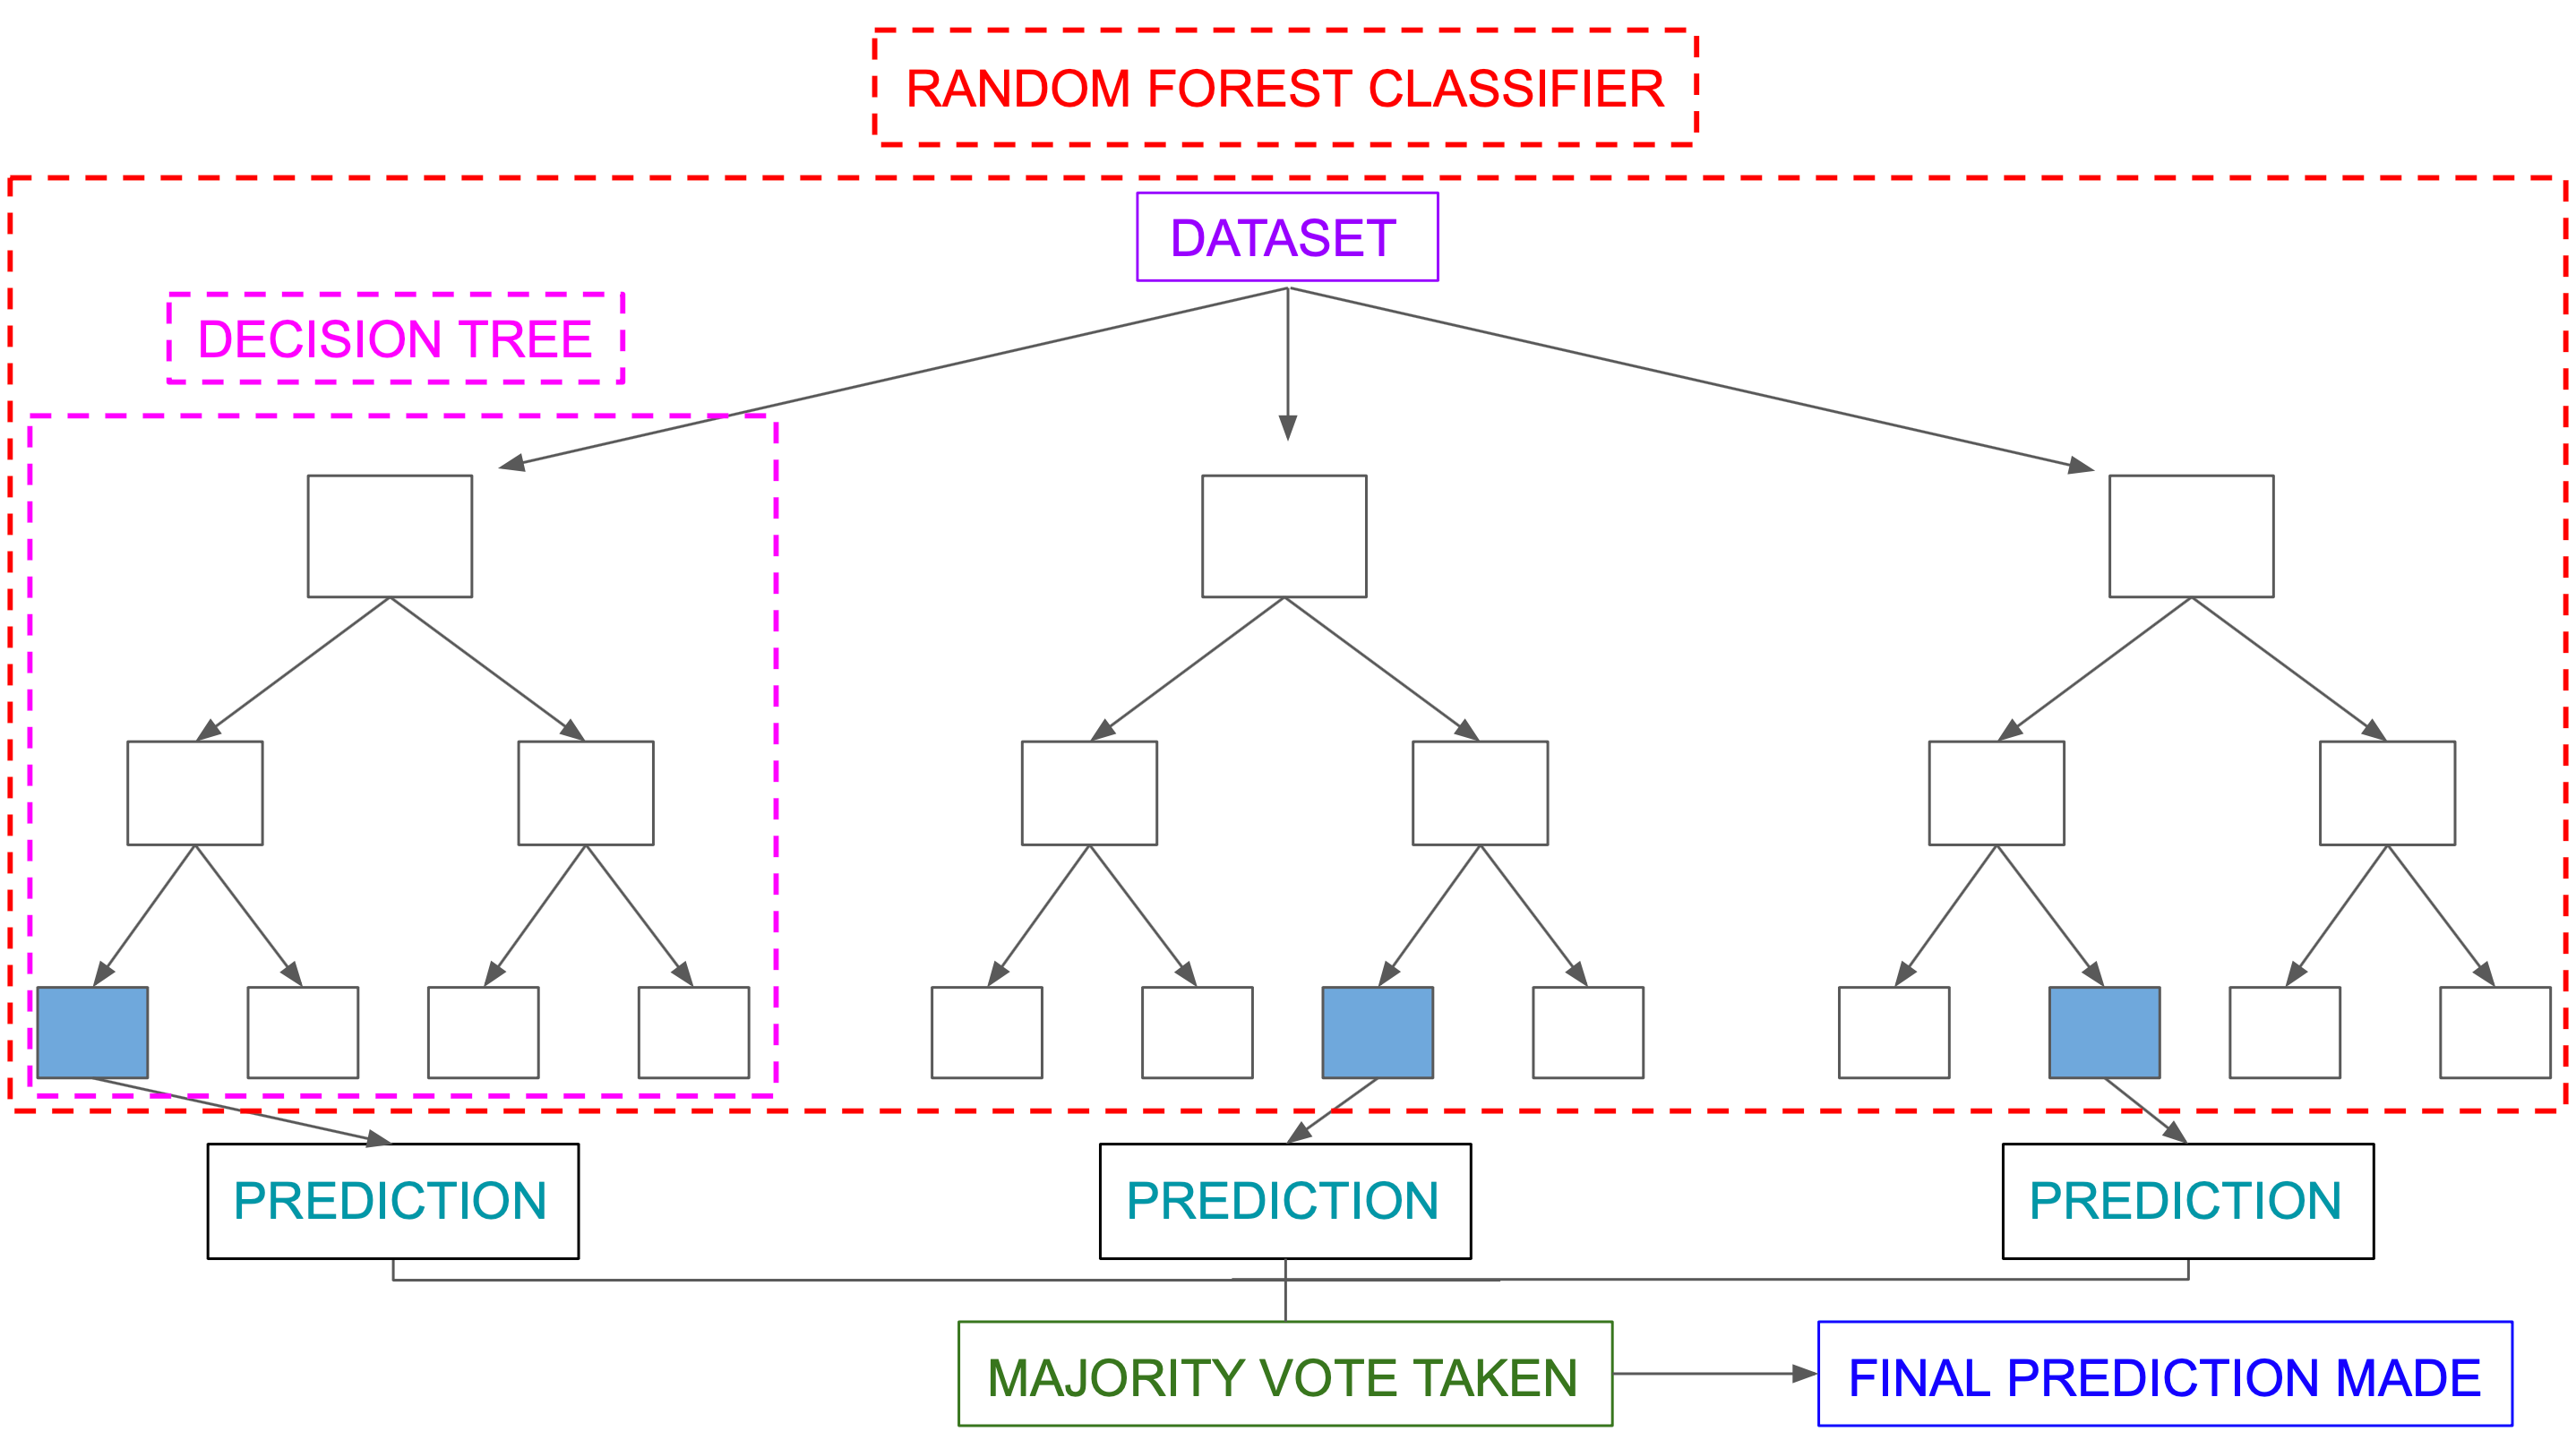

### Evaluate the models

In [53]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_rfc))#Test accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preRFC))#Traning accuracy

Test Accuracy :  0.922879177377892
Traning Accuracy :  0.9768041237113402


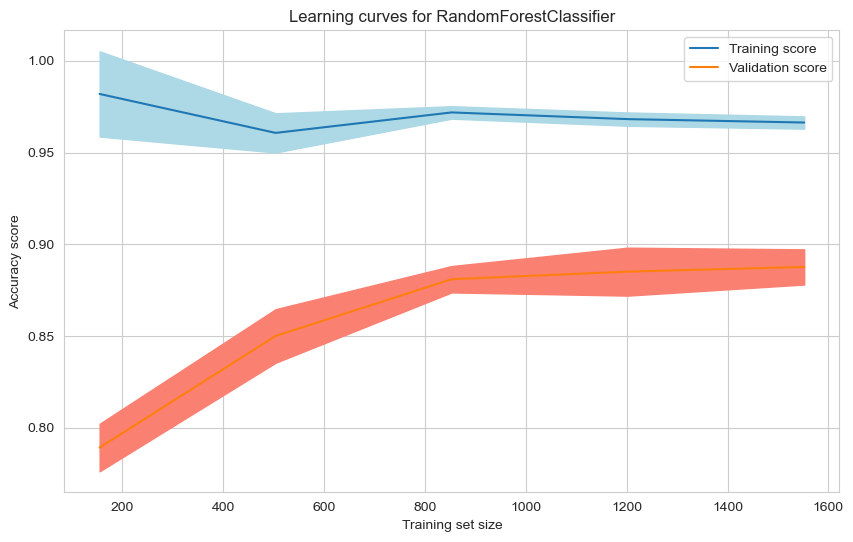

In [54]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(rfc, x, y, scoring="accuracy")
scoring = 'accuracy'
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='salmon')
plt.title('Learning curves for RandomForestClassifier')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

* If the training and validation scores are both low and close to each other, the model is underfitting. This means the model is too simple and cannot learn the complexity of the data. You can try to increase the model complexity, add more features, or reduce the regularization

 Random Forest Classifier Accuracy Score:  0.922879177377892
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.89      0.91      0.90        95
           2       0.87      0.87      0.87        90
           3       0.96      0.94      0.95        96

    accuracy                           0.92       389
   macro avg       0.92      0.92      0.92       389
weighted avg       0.92      0.92      0.92       389



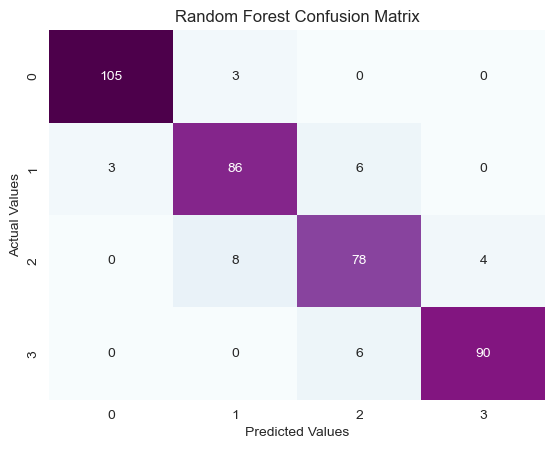

In [55]:
def my_confusion_matrix(y_test, y_pred_rfc, plt_title):
    cm=confusion_matrix(y_test, y_pred_rfc)
    print(classification_report(y_test, y_pred_rfc))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

## Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [57]:
y_pred_gnb=gnb.predict(x_test)#Test Prediction
x_train_preGNB=gnb.predict(x_train)#Traning Prediction

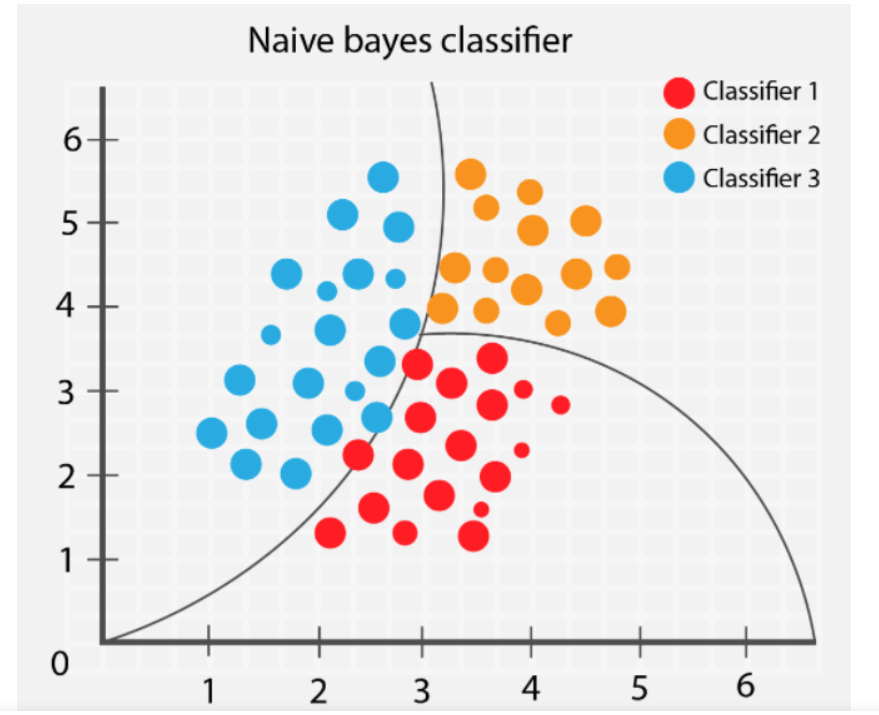

### Evaluate the models

In [58]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_gnb))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preGNB))#Traning accuracy

Test Accuracy :  0.8123393316195373
Traning Accuracy :  0.8157216494845361


 Naive Bayes Accuracy Score:  0.8123393316195373
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       108
           1       0.68      0.79      0.73        95
           2       0.74      0.68      0.71        90
           3       0.91      0.92      0.91        96

    accuracy                           0.81       389
   macro avg       0.81      0.81      0.81       389
weighted avg       0.82      0.81      0.81       389



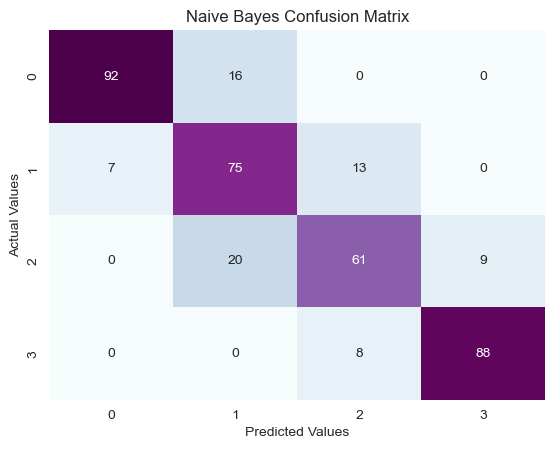

In [59]:
def my_confusion_matrix(y_test, y_pred_gnb, plt_title):
    cm=confusion_matrix(y_test, y_pred_gnb)
    print(classification_report(y_test, y_pred_gnb))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' Naive Bayes Accuracy Score: ',accuracy_score(y_test,y_pred_gnb))
cm_rfc=my_confusion_matrix(y_test, y_pred_gnb, 'Naive Bayes Confusion Matrix')

* Naive Bayes is a supervised machine learning algorithm that uses Bayes’ theorem to calculate the probability of a class label given some features.
* Naive Bayes work well with Classification Problem and we got 80% accuracy

## KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [61]:
y_pred_knn=knn.predict(x_test)#Test prediction
x_train_preKNN=knn.predict(x_train)#Traning Prediction

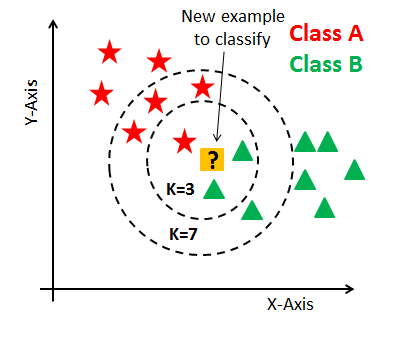

### Evaluate the models

In [62]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_knn))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preKNN))#Traning Accuracy

Test Accuracy :  0.9177377892030848
Traning Accuracy :  0.9606958762886598


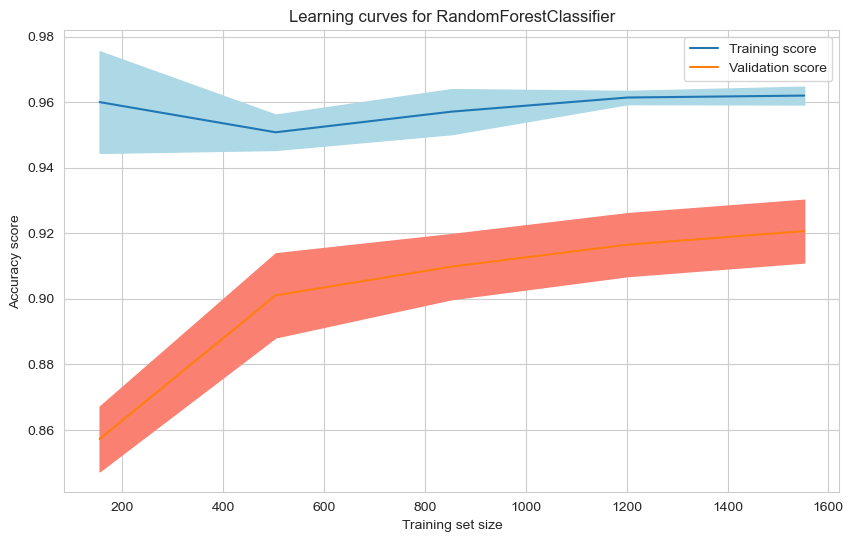

In [63]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(knn, x, y, scoring="accuracy")
scoring = 'accuracy'
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='salmon')
plt.title('Learning curves for RandomForestClassifier')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

* If the training and validation scores are both low and close to each other, the model is underfitting. This means the model is too simple and cannot learn the complexity of the data. You can try to increase the model complexity, add more features, or reduce the regularization

 KNN Classifier Accuracy Score:  0.9177377892030848
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.86      0.94      0.90        95
           2       0.90      0.86      0.88        90
           3       0.94      0.94      0.94        96

    accuracy                           0.92       389
   macro avg       0.92      0.92      0.92       389
weighted avg       0.92      0.92      0.92       389



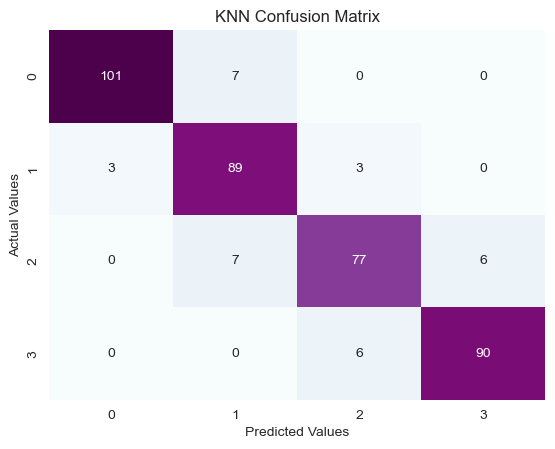

In [64]:
def my_confusion_matrix(y_test, y_pred_knn, plt_title):
    cm=confusion_matrix(y_test, y_pred_knn)
    print(classification_report(y_test, y_pred_knn))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

* KNN stands for K-Nearest Neighbors, a supervised machine learning algorithm that can be used for both classification and    regression problems. It works by finding the K most similar data points in the training set to a new data point, and then assigning it the label or value based on the majority vote or average of the K neighbors.
* KNN is also a lazy learner algorithm
* KNN is a non-parametric method

## SVM Classifier

In [65]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [66]:
y_pred_svm=svm_clf.predict(x_test)#Test Prediction
x_train_preSVM=svm_clf.predict(x_train)#Traning Prediction

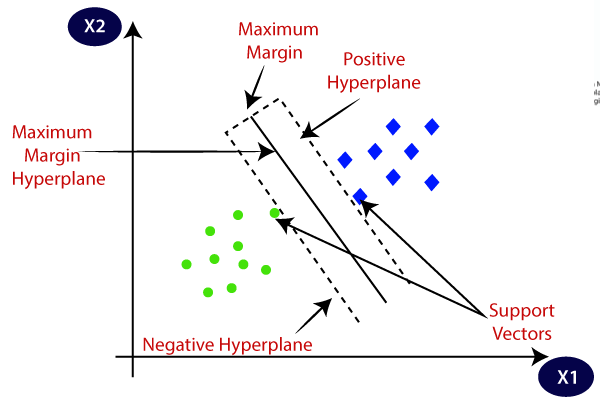

### Evaluate the models

In [67]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_svm))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preSVM))#Traning Accuracy

Test Accuracy :  0.9588688946015425
Traning Accuracy :  0.9536082474226805


 SVM Classifier Accuracy Score:  0.9588688946015425
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.92      0.97      0.94        95
           2       0.96      0.89      0.92        90
           3       0.96      0.99      0.97        96

    accuracy                           0.96       389
   macro avg       0.96      0.96      0.96       389
weighted avg       0.96      0.96      0.96       389



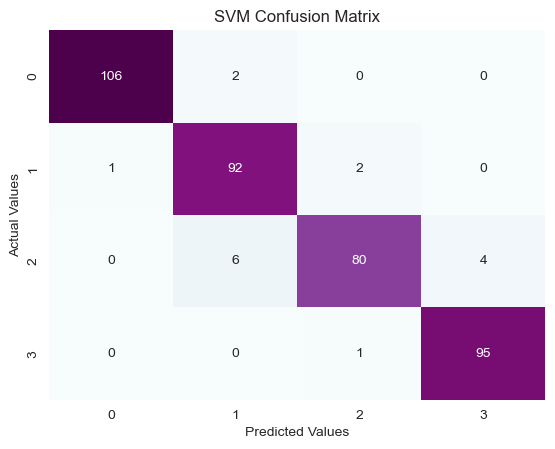

In [68]:
def my_confusion_matrix(y_test, y_pred_svm, plt_title):
    cm=confusion_matrix(y_test, y_pred_svm)
    print(classification_report(y_test, y_pred_svm))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm
print(' SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

* SVM stands for Support Vector Machine, a supervised machine learning algorithm that can be used for both classification and regression problems. SVM works by finding the optimal hyperplane that separates the data points in different classes with the maximum margin.
* Out of all models we are got height accuracy 95% becaused they used marginal distance technique- Eigen vector, Eigen value and draw hyperplane

## Insight

* Some of these algorithms have high testing (Unseen Data) accuracy and low traning accuracy (Seen Data),But doesn't usually happen.
* Logistic Regrresion - Test Accuracy- 65% Training accuracy 62% ----> Underfitting Model and low accuracy
* Decision Tree - Test Accuracy- 83% Training accuracy 85% ----> Perfect but low accuracy
* KNN - Test Accuracy- 91% Training accuracy 96% ----> Perfect Model
* Naive Bayes -Test Accuracy- 81% Training accuracy 81% ---->  Your model is well-fitting (generalized) but we can improve the     accuracy and performance
* Random Forest -Test Accuracy- 92% Training accuracy 97% ----> Perfect Model
* SVM - Test Accuracy- 95% Training accuracy 95% ----> Perfect Model but we can improve little bit using Hyperparameter Tuning
* So that why some of these models are underfit and low accuracy  
* When your model is underfit and low accuracy,then we can use different method
* What is underfiting?
* When we have low traning accuracy and high testing accuracy we can say this model is konw as Underfitting model

### 4 method to avoid Underfitting 
1) Principal Componant Analysis
2) Cross-Validation
3) Smooth Technique
4) Hyperparameter Tuning

# PCA

* PCA (Principal Component Analysis) is a technique for dimensionality reduction that identifies a set of orthogonal axes,         called principal components, that capture the maximum variance in the data3. This can help reduce underfitting by removing       irrelevant or redundant features that may confuse the model or introduce noise.

In [69]:
data1=data[["Battery_Power","Bluetooth","Clock_Speed","Dual_Sim","Selfi_Camera","4G","Internal_Memory","Mobile_Depth","Mobile_Width","Number_Of_Cores","Primary_Camera","Pixel_Height","Pixel_Width","RAM","Screen_Height","Screen_Width"]]

In [70]:
x1=data1
y1=data.Price_Range

In [71]:
#Preparing Training and Testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=23)

## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
m=LogisticRegression()
m.fit(x_train,y_train)

LogisticRegression()

In [73]:
p1=m.predict(x_test)#Test Prediction
xq=m.predict(x_train)#Tranning Prediction

In [74]:
print("Test Accuracy : " ,accuracy_score(y_test,p1))#Test Acuracy
print("Training Accuracy : " ,accuracy_score(y_train,xq))#Tranning Accuracy

Test Accuracy :  0.6529562982005142
Training Accuracy :  0.6365979381443299


## Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
d1=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1,min_samples_split=30,splitter="random")#object creation for decision tree  
d1.fit(x_train,y_train)#training the model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=30,
                       splitter='random')

In [76]:
Prediction_of_DT1=d1.predict(x_test)#Test Prediction
x_train_preDT2=d1.predict(x_train)#Traning Prediction

In [77]:
print("Test Accuracy : " ,accuracy_score(y_test,Prediction_of_DT1))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preDT2))#Traning Accuracy

Test Accuracy :  0.8406169665809768
Traning Accuracy :  0.8588917525773195


## Random Forest Classifier

In [78]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [79]:
#Now, we do the training and prediction.
rfc1.fit(x_train, y_train)
y_p1=rfc1.predict(x_test)#Test prediction 
x_t1=rfc1.predict(x_train)#Traning Prediction

In [80]:
print("Test Accuracy : " ,accuracy_score(y_test,y_p1))#Test accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_t1))#Traning accuracy

Test Accuracy :  0.884318766066838
Traning Accuracy :  0.9536082474226805


## Naive bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(x_train, y_train)

GaussianNB()

In [82]:
y_pred_gnb1=gnb1.predict(x_test)#Test Prediction
x_train_preGNB1=gnb1.predict(x_train)#Traning Prediction

In [83]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_gnb1))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preGNB1))#Traning Accuracy

Test Accuracy :  0.8200514138817481
Traning Accuracy :  0.8079896907216495


## Support Vector Machine

In [84]:
from sklearn import svm
svm_clf1 = svm.SVC(decision_function_shape='ovo')
svm_clf1.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [85]:
y_pred_svm1=svm_clf1.predict(x_test)#Test Prediction
x_train_preSVM1=svm_clf1.predict(x_train)#Traning Prediction

In [86]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_svm1))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preSVM1))#Traning Accuracy

Test Accuracy :  0.9717223650385605
Traning Accuracy :  0.9478092783505154


## KNN

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn1.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [88]:
y_pred_knn1=knn1.predict(x_test)#Test prediction
x_train_preKNN1=knn1.predict(x_train)#Traning Prediction

In [89]:
print(accuracy_score(y_test,y_pred_knn1))#Test Accuracy
print(accuracy_score(y_train,x_train_preKNN1))#Traning Accuracy

0.9485861182519281
0.9587628865979382


# Smooth Techanique

* Smoothing is a technique for removing noise from a data set and capturing important patterns. It involves creating an approximating function that fits the data with a smooth curve or surface.

In [90]:
#Blancing data
from collections import Counter
from imblearn.over_sampling import SMOTE 
sm=SMOTE()
print(Counter(y))
x_sm,y_sm=sm.fit_resample(x1,y1)#appling sampling on target variable
print(Counter(y_sm))#Checking count after sampling for each class

Counter({0: 489, 3: 485, 2: 484, 1: 483})
Counter({1: 489, 2: 489, 3: 489, 0: 489})


## LogisticRegression

In [91]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()
m1.fit(x_sm,y_sm)

LogisticRegression()

In [92]:
a1=m1.predict(x_test)#Test Prediction
r1=m1.predict(x_train)#Tranning Prediction

In [93]:
print("Test Accuracy : " ,accuracy_score(y_test,p1))#Test Acuracy
print("Traning Accuracy : ",accuracy_score(y_train,xq))#Tranning Accuracy

Test Accuracy :  0.6529562982005142
Traning Accuracy :  0.6365979381443299


## DecisionTreeClassifier

In [94]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt11=DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=1,min_samples_split=30,splitter="random")#object creation for decision tree  
dt11.fit(x_sm,y_sm)#training the model

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=30,
                       splitter='random')

In [95]:
y_hat1=dt11.predict(x_test)#Test Prediction
x_train_preDTSmote=dt11.predict(x_train)#Traning Prediction

In [96]:
print("Test Accuracy : " ,accuracy_score(y_test,y_hat1))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preDTSmote))#Traning Accuracy

Test Accuracy :  0.8920308483290489
Traning Accuracy :  0.8717783505154639


## RandomForestClassifier

In [97]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc1ss=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

In [98]:
#Now, we do the training and prediction.
rfc1ss.fit(x_sm,y_sm)
y_p12=rfc1ss.predict(x_test)#Test prediction 
x_t12=rfc1ss.predict(x_train)#Traning Prediction

In [99]:
print("Test Accuracy : " ,accuracy_score(y_test,y_p12))#Test accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_t12))#Traning accuracy

Test Accuracy :  0.9717223650385605
Traning Accuracy :  0.9548969072164949


## Naive_Bayes

In [100]:
from sklearn.naive_bayes import GaussianNB
gnb11 = GaussianNB()
gnb11.fit(x_sm,y_sm)

GaussianNB()

In [101]:
y_pred_gnb14=gnb11.predict(x_test)#Test Prediction
x_train_preGNB14=gnb11.predict(x_train)#Traning Prediction

In [102]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_knn1))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preKNN1))#Traning Accuracy

Test Accuracy :  0.9485861182519281
Traning Accuracy :  0.9587628865979382


## KNeighborsClassifier

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn13 = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn13.fit(x_sm,y_sm)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [104]:
y_pred_knn14=knn13.predict(x_test)#Test prediction
x_train_preKNN14=knn13.predict(x_train)#Traning Prediction

In [105]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_knn14))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preKNN14))#Traning Accuracy

Test Accuracy :  0.9717223650385605
Traning Accuracy :  0.9606958762886598


## Support Vector Machine

In [106]:
from sklearn import svm
svm_clf11 = svm.SVC(decision_function_shape='ovo')
svm_clf11.fit(x_sm,y_sm)

SVC(decision_function_shape='ovo')

In [107]:
y_pred_svm13=svm_clf11.predict(x_test)#Test Prediction
x_train_preSVM13=svm_clf11.predict(x_train)#Traning Prediction

In [108]:
print("Test Accuracy : " ,accuracy_score(y_test,y_pred_svm13))#Test Accuracy
print("Traning Accuracy : ",accuracy_score(y_train,x_train_preSVM13))#Traning Accuracy

Test Accuracy :  0.9717223650385605
Traning Accuracy :  0.9503865979381443


## Insight

* Logistic Regression - Test Accuracy- 65% Training accuracy 63% ---->  Low accuracy and underfitting
* K-Nearest Neighbours - Test Accuracy- 93% Training accuracy 95% ---->  Generalised Model
* Random Forest - Test Accuracy- 97% Training accuracy 95% ---->    underfitting Model
* Naive Bayes - Test Accuracy- 94% Training accuracy 95% ----> Generalised Model
* Decision Tree - Test Accuracy- 88% Training accuracy 86% ----> underfitting Model
* Support vector machine - Test Accuracy- 97% Training accuracy 94% ----> underfitting model

# Cross_Validation

* Cross-validation is a technique for validating the performance of a model on unseen data. It involves dividing the data into multiple folds or subsets, using one of them as a validation set, and training the model on the rest.

## Logistics Regression

In [109]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
log_regg = LogisticRegression()
scores = cross_val_score(log_regg, x, y, cv=10, scoring='accuracy')
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())
print('Standard deviation of cross-validation score:', scores.std())

Cross-validation scores: [0.60512821 0.65979381 0.63402062 0.68556701 0.62886598 0.63917526
 0.58247423 0.66494845 0.62371134 0.61340206]
Mean cross-validation score: 0.6337086968014802
Standard deviation of cross-validation score: 0.028901894271101177


## DecisionTree

In [110]:
dtc1 = DecisionTreeClassifier()
scores1 = cross_val_score(dtc1, x, y, cv=10, scoring='accuracy')
print('Cross-validation scores:', scores1)
print('Mean cross-validation score:', scores1.mean())
print('Standard deviation of cross-validation score:', scores1.std())

Cross-validation scores: [0.81025641 0.86082474 0.82474227 0.84020619 0.86082474 0.84536082
 0.80927835 0.82474227 0.82989691 0.80927835]
Mean cross-validation score: 0.8315411049431667
Standard deviation of cross-validation score: 0.018763212831016625


## KNN

In [111]:
knn1 = KNeighborsClassifier()
score = cross_val_score(knn1, x, y, cv=10, scoring='accuracy')
print('Cross-validation scores:', score)
print('Mean cross-validation score:', score.mean())
print('Standard deviation of cross-validation score:', score.std())

Cross-validation scores: [0.8974359  0.94845361 0.92783505 0.93814433 0.92783505 0.94329897
 0.91752577 0.90721649 0.90721649 0.91752577]
Mean cross-validation score: 0.923248744382765
Standard deviation of cross-validation score: 0.015959691361402507


## Random Forest Classifier

In [112]:
RFC = RandomForestClassifier()
scores2 = cross_val_score(RFC, x, y, cv=10, scoring='accuracy')
print('Cross-validation scores:', scores2)
print('Mean cross-validation score:', scores2.mean())
print('Standard deviation of cross-validation score:', scores2.std())

Cross-validation scores: [0.89230769 0.87628866 0.8814433  0.89175258 0.89690722 0.89690722
 0.87113402 0.84536082 0.85051546 0.8814433 ]
Mean cross-validation score: 0.8784060269627278
Standard deviation of cross-validation score: 0.01732529651476832


## SVM

In [113]:
from sklearn.svm import SVC
svm1 = SVC()
scores3 = cross_val_score(svm1, x, y, cv=10, scoring='accuracy')
print('Cross-validation scores:', scores3)
print('Mean cross-validation score:', scores3.mean())
print('Standard deviation of cross-validation score:', scores3.std())

Cross-validation scores: [0.96923077 0.94329897 0.93814433 0.94845361 0.94329897 0.95876289
 0.94845361 0.95360825 0.92783505 0.95876289]
Mean cross-validation score: 0.9489849325931801
Standard deviation of cross-validation score: 0.011191723811657022


## Naive Bayes

In [114]:
gnb1 = GaussianNB()
scores4 = cross_val_score(gnb1, x, y, cv=10, scoring='accuracy')
print('Cross-validation scores:', scores4)
print('Mean- cross-validation score:', scores4.mean())
print('Standard deviation of cross-validation score:', scores4.std())

Cross-validation scores: [0.78974359 0.79381443 0.84020619 0.81443299 0.84536082 0.82474227
 0.79896907 0.80412371 0.77319588 0.78865979]
Mean- cross-validation score: 0.8073248744382765
Standard deviation of cross-validation score: 0.022286047799662943


## Insight

* Logistic Regression - (Mean Score -63% )
* K-Nearest Neighbours - (Mean Score -92% )
* Random Forest - (Mean Score -87% )
* Naive Bayes - (Mean Score -80% )
* Decision Tree - (Mean Score -82% )
* Support vector machine - (Mean Score -94% )

## Hyperparameter Tuning

* Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters, which are settings that control the learning process of the model. This can help reduce underfitting by finding the best combination of hyperparameters that allow the model to learn from the data effectively and efficiently.

## Logistic Regression

In [115]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()

In [116]:
grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.01, 0.1, 1, 10, 100]}

In [117]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

In [118]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [119]:
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [120]:
y_pred = grid_search.predict(x_test)#Predict x_test
y_pred1 = grid_search.predict(x_train)#Predict x_train

In [121]:
#Comparison Between Orignal and Predicted
acc = accuracy_score(y_test, y_pred)#Testing Data
acc1 = accuracy_score(y_train,y_pred1)#Training Data

In [122]:
print("Test Accuracy : " , acc)#Testing Score
print("Traning Accuracy : ", acc1)#Traning Score 

Test Accuracy :  0.9768637532133676
Traning Accuracy :  0.979381443298969


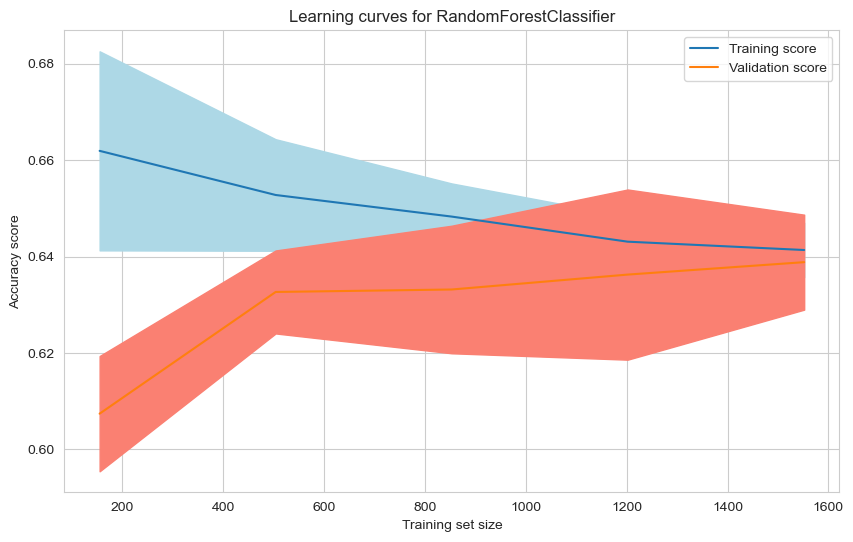

In [123]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(log_reg, x, y, scoring="accuracy")
scoring = 'accuracy'
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, val_mean, label='Validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='lightblue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='salmon')
plt.title('Learning curves for RandomForestClassifier')
plt.xlabel('Training set size')
plt.ylabel('Accuracy score')
plt.legend()
plt.show()

* If the training and validation scores are both low and close to each other, the model is underfitting. This means the model is too simple and cannot learn the complexity of the data. You can try to increase the model complexity, add more features, or reduce the regularization

## KNN

In [124]:
# create a KNN classifier
knn = KNeighborsClassifier()

In [125]:
# define the grid of hyperparameters
grid1 = {'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']}

In [126]:
grid_search1 = GridSearchCV(estimator=knn, param_grid=grid1, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

In [127]:
grid_search1.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [128]:
print('Best hyperparameters:', grid_search1.best_params_)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [129]:
y_pred1 = grid_search1.predict(x_test)#Predict x_test
y_pred2 = grid_search1.predict(x_train)#Predict x_train

In [130]:
#Comparison Between Orignal and Predicted
acc1 = accuracy_score(y_test, y_pred1)#Testing Data
acc2 = accuracy_score(y_train,y_pred2)#Training Data

In [131]:
print("Test Accuracy : " , acc1)#Testing Score
print("Traning Accuracy : ",acc2)#Traning Score

Test Accuracy :  0.9485861182519281
Traning Accuracy :  1.0


## Random Forest Classifier

In [132]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier()

In [133]:
grid2 = {'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'max_features': ['auto', 'sqrt', 'log2'],
        'criterion': ['gini', 'entropy']}

In [134]:
grid_search2 = GridSearchCV(estimator=rfc1, param_grid=grid2, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

In [135]:
grid_search2.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=RandomForestClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [136]:
print('Best hyperparameters:', grid_search2.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [137]:
y_pred2 = grid_search2.predict(x_test)#Predict x_test
y_pred3 = grid_search2.predict(x_train)#Predict x_train

In [138]:
#Comparison Between Orignal and Predicted
acc2 = accuracy_score(y_test, y_pred2)#Testing Data
acc3 = accuracy_score(y_train,y_pred3)#Traning Score

In [139]:
print("Test Accuracy : " , acc2)#Testing Score
print("Traning Accuracy : ", acc3)#Traning Score

Test Accuracy :  0.9254498714652957
Traning Accuracy :  1.0


## Naive Bayes

In [140]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [141]:
grid3 = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

In [142]:
grid_search3 = GridSearchCV(estimator=gnb, param_grid=grid3, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

In [143]:
grid_search3.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy')

In [144]:
print('Best hyperparameters:', grid_search3.best_params_)

Best hyperparameters: {'var_smoothing': 1e-09}


In [145]:
y_pred3 = grid_search3.predict(x_test)#Predict x_test
y_pred4 = grid_search3.predict(x_train)#Predict x_train

In [146]:
#Comparison Between Orignal and Predicted
acc3 = accuracy_score(y_test, y_pred3)#Testing Data
acc4 = accuracy_score(y_train,y_pred4)#Traning Score

In [147]:
print("Test Accuracy : " , acc3)#Testing Score
print("Traning Accuracy : ", acc4)#Traning Score

Test Accuracy :  0.8200514138817481
Traning Accuracy :  0.8079896907216495


## SVM Classifier

In [148]:
from sklearn.svm import SVC
svm = SVC()

In [149]:
grid4 = {'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto']}

In [150]:
grid_search4 = GridSearchCV(estimator=svm, param_grid=grid4, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

In [151]:
grid_search4.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [152]:
print('Best hyperparameters:', grid_search4.best_params_)

Best hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [153]:
y_pred4= grid_search4.predict(x_test)#Predict x_test
y_pred5= grid_search4.predict(x_train)#Predict x_train

In [154]:
#Comparison Between Orignal and Predicted
acc4 = accuracy_score(y_test, y_pred4)#Testing Data
acc5 = accuracy_score(y_train,y_pred5)#Traning Data

In [155]:
print("Test Accuracy : " , acc4)#Testing Score
print("Traning Accuracy : ", acc5)#Traning Score

Test Accuracy :  0.9845758354755784
Traning Accuracy :  0.9871134020618557


## Decision Tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [157]:
grid5 = {'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10]}

In [158]:
grid_search5 = GridSearchCV(estimator=dtc, param_grid=grid5, cv=10, scoring='accuracy', n_jobs=-1, error_score=0)

In [159]:
grid_search5.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=0, estimator=DecisionTreeClassifier(),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [160]:
print('Best hyperparameters:', grid_search5.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [161]:
y_pred5 = grid_search5.predict(x_test)#Predict x_test
y_pred6= grid_search5.predict(x_train)#Predict x_train

In [162]:
#Comparison Between Orignal and Predicted
acc5 = accuracy_score(y_test, y_pred5)#Testing Data
acc6 = accuracy_score(y_train,y_pred6)#Traning Data

In [163]:
print("Test Accuracy : " , acc5)#Testing Score
print("Traning Accuracy : ", acc6)#Traning Score

Test Accuracy :  0.8946015424164524
Traning Accuracy :  0.9600515463917526


## Insight

* Thus we have increased the accuracy of models by using hyperparameter tuning
* Logistic Regression - Test Accuracy- 97% Training accuracy 97% ---->  Generalised Model
* K-Nearest Neighbours - Test Accuracy- 94% Training accuracy 100% ---->  Overfitting Model
* Random Forest - Test Accuracy- 92% Training accuracy 100% ---->    Overfitting Model
* Naive Bayes - Test Accuracy- 82% Training accuracy 80% ----> Acuuracy has not increased
* Decision Tree - Test Accuracy- 89% Training accuracy 95% ----> Generalised Model
* Support vector machine - Test Accuracy- 98% Training accuracy 98% ----> Generalised model

## Challenges

  1) Understandard Statistical insight
  2) The biggest problem i faced was underfitting because i was not getting good accuracy.
* I used the following technique
  1) PCA : Using PCA algorithm i improved the accuracy to some extent but still some models did not improve so i used  cross-     validation technique.
  2) Cross-Validation : By using this method we can improved the accuracy to a small extent. however accuracy was not incresing   in some cases again i used diffrent technique.
  3) Smooth technique : Accuracy improved to some extent but still our accuracy was not as good as we want then i used             Hyperparameter tuning.
  4) Hyperparameter Tuning : By using this technique we can improve the accuracy as we want.Thus we solved the problem of         cellphone price prediction using hyperparameter

## Final Conclusion

* All over project we used so many technique For Example- find relation between various feature ,remove outlier,check missing   value,Perform EDA,find best feature using PCA,Cross-validation,smooth technique,hyperparameter tuning and train_test_split model evaluation etc.. 
* We got good accuracy with two model 1) SVM Classifier 2) Logistics Regression
* SVM have 97% Accuracy so this is best model for production
* like that we soveld cellphone price prediction problem